# LiverPatientPred

Data set of Liver Patient prediction is an Supervised Classification model, were we need to predict the liver patient. The data set contains 583 records of Liver disease patient and Non-Liver disease patient. Our main goal is to teach different algorithms based on the dataset so when a new record is fed, our best performing classifier can be used to predict.

### Importing required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',500)
import warnings
warnings.filterwarnings("ignore")

### Reading the Dataset:

In [2]:
data = pd.read_csv(r"C:\Users\saipr\OneDrive\Desktop\PRCP-1007-LiverPatientPred\Data\Indian Liver Patient Dataset (ILPD).csv")

In [3]:
data

age  gender  tot_bilirubin  direct_bilirubin  alkphos  sgpt  sgot  \
0     65  Female            0.7               0.1      187    16    18   
1     62    Male           10.9               5.5      699    64   100   
2     62    Male            7.3               4.1      490    60    68   
3     58    Male            1.0               0.4      182    14    20   
4     72    Male            3.9               2.0      195    27    59   
..   ...     ...            ...               ...      ...   ...   ...   
578   60    Male            0.5               0.1      500    20    34   
579   40    Male            0.6               0.1       98    35    31   
580   52    Male            0.8               0.2      245    48    49   
581   31    Male            1.3               0.5      184    29    32   
582   38    Male            1.0               0.3      216    21    24   

     tot_proteins  albumin  ag_ratio  is_patient  
0             6.8      3.3      0.90           1  
1             7.5      3.2      0.74           1  
2             7.0      3.3      0.89           1  
3             6.8      3.4      1.00           1  
4             7.3      2.4      0.40           1  
..            ...      ...       ...         ...  
578           5.9      1.6      0.37           2  
579           6.0      3.2      1.10           1  
580           6.4      3.2      1.00           1  
581           6.8      3.4      1.00           1  
582           7.3      4.4      1.50           2  

[583 rows x 11 columns]

### Explanation of features 

Bilirubin - Bilirubin (bil-ih-ROO-bin) is a yellowish pigment that is made during the normal breakdown of red blood cells. Bilirubin passes through the liver and is eventually excreted out of the body. Higher than normal levels of bilirubin may indicate different types of liver or bile duct problems

tot_bilirubin - This is a blood test that measures the amount of a substance called bilirubin. This test is used to find out how well your liver is working. It is often part of a panel of tests that measure liver function. A small amount of bilirubin in your blood is normal, but a high level may be a sign of liver disease. Normal results for a total bilirubin test are 1.2 milligrams per deciliter (mg/dL) for adults and usually 1 mg/dL for those under 18

direct_bilirubin - In the liver, bilirubin is changed into a form that your body can get rid of. This is called conjugated bilirubin or direct bilirubin. This bilirubin travels from the liver into the small intestine. A very small amount passes into your kidneys and is excreted in your urine. Direct (also called conjugated) bilirubin: less than 0.3 mg/dL (less than 5.1 µmol/L)

alkphos - An alkaline phosphatase (ALP) test measures the amount of ALP in your blood. ALP is an enzyme found in many parts of your body.

sgpt - An enzyme found in the liver and other tissues. A high level of SGPT released into the blood may be a sign of liver damage, cancer, or other diseases. SGPT is released into blood when the liver or heart are damaged. Normal levels of SGPT: 7-56 units/liter of serum

sgot - An enzyme found in the liver, heart, and other tissues. A high level of SGOT released into the blood may be a sign of liver or heart damage, cancer, or other diseases. Normal levels of SGOT: 8-44 units/liter of serum. A score above 50 for men and 45 for women is high and may indicate damage

tot_proteins - A total protein test is often done as part of your regular checkup. It measures the amount of two kinds of protein in your body, albumin and globulin.

albumin - Albumin is a protein made by the liver. A serum albumin test measures the amount of this protein in the clear liquid portion of the blood. The normal range is 3.4 to 5.4 g/dL (34 to 54 g/L)

ag_ratio - A total protein and albumin/globulin (A/G) ratio test measures the total amount of protein in your blood. The normal range for albumin/globulin ratio is over 1 , usually around 1 to 2.

##### We found that 'is_patient' is our Dependent feature and all the other features are independent

# Basic Checks -

### To check all the feature names

In [4]:
data.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'alkphos', 'sgpt',
       'sgot', 'tot_proteins', 'albumin', 'ag_ratio', 'is_patient'],
      dtype='object')

### Check the info of the data to understand the summary of the dataframe along with the memory usage

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   alkphos           583 non-null    int64  
 5   sgpt              583 non-null    int64  
 6   sgot              583 non-null    int64  
 7   tot_proteins      583 non-null    float64
 8   albumin           583 non-null    float64
 9   ag_ratio          579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Describe gives us the count, mean, standard deviation, minimum, 25% percentile, 50% percentile, 75% percentile and max of the numerical features

In [6]:
data.describe()

age  tot_bilirubin  direct_bilirubin      alkphos         sgpt  \
count  583.000000     583.000000        583.000000   583.000000   583.000000   
mean    44.746141       3.298799          1.486106   290.576329    80.713551   
std     16.189833       6.209522          2.808498   242.937989   182.620356   
min      4.000000       0.400000          0.100000    63.000000    10.000000   
25%     33.000000       0.800000          0.200000   175.500000    23.000000   
50%     45.000000       1.000000          0.300000   208.000000    35.000000   
75%     58.000000       2.600000          1.300000   298.000000    60.500000   
max     90.000000      75.000000         19.700000  2110.000000  2000.000000   

              sgot  tot_proteins     albumin    ag_ratio  is_patient  
count   583.000000    583.000000  583.000000  579.000000  583.000000  
mean    109.910806      6.483190    3.141852    0.947064    1.286449  
std     288.918529      1.085451    0.795519    0.319592    0.452490  
min      10.000000      2.700000    0.900000    0.300000    1.000000  
25%      25.000000      5.800000    2.600000    0.700000    1.000000  
50%      42.000000      6.600000    3.100000    0.930000    1.000000  
75%      87.000000      7.200000    3.800000    1.100000    2.000000  
max    4929.000000      9.600000    5.500000    2.800000    2.000000

### Check unique values of each features

In [7]:
data.nunique()

age                  72
gender                2
tot_bilirubin       113
direct_bilirubin     80
alkphos             263
sgpt                152
sgot                177
tot_proteins         58
albumin              40
ag_ratio             69
is_patient            2
dtype: int64

# Data Preprocessing

### Finding Null values of each features using Heatmap

<AxesSubplot:>

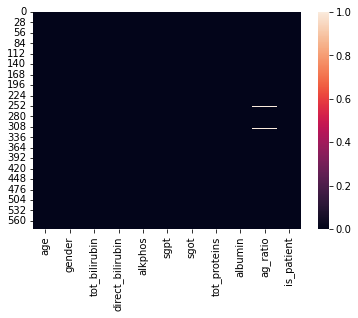

In [8]:
sns.heatmap(data.isnull(),linecolor="b")

We find there is only one column with null values.

Now lets check the total count of the null value

In [9]:
data['ag_ratio'].isnull().sum()

4

### Displaying the null values

In [10]:
data[pd.isnull(data['ag_ratio'])]

age  gender  tot_bilirubin  direct_bilirubin  alkphos  sgpt  sgot  \
209   45  Female            0.9               0.3      189    23    33   
241   51    Male            0.8               0.2      230    24    46   
253   35  Female            0.6               0.2      180    12    15   
312   27    Male            1.3               0.6      106    25    54   

     tot_proteins  albumin  ag_ratio  is_patient  
209           6.6      3.9       NaN           1  
241           6.5      3.1       NaN           1  
253           5.2      2.7       NaN           2  
312           8.5      4.8       NaN           2

### Replace null value

<AxesSubplot:xlabel='ag_ratio', ylabel='Density'>

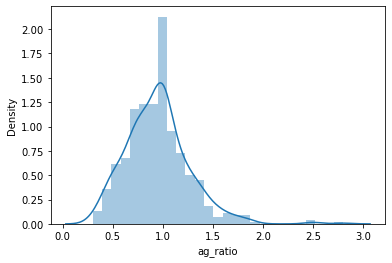

In [11]:
sns.distplot(data['ag_ratio'])

#### As the data is tailed, so we use mean to replace 4 null values of ag_ratio feature

In [12]:
data['ag_ratio'].fillna(data['ag_ratio'].mean(), inplace = True)

### Checking duplicates

In [13]:
data.duplicated().sum()

13

#### As there are 13 duplicate rows, we are dropping those duplicates

In [14]:
data[data.duplicated()]

age  gender  tot_bilirubin  direct_bilirubin  alkphos  sgpt  sgot  \
19    40  Female            0.9               0.3      293   232   245   
26    34    Male            4.1               2.0      289   875   731   
34    38  Female            2.6               1.2      410    59    57   
55    42    Male            8.9               4.5      272    31    61   
62    58    Male            1.0               0.5      158    37    43   
106   36    Male            5.3               2.3      145    32    92   
108   36    Male            0.8               0.2      158    29    39   
138   18    Male            0.8               0.2      282    72   140   
143   30    Male            1.6               0.4      332    84   139   
158   72    Male            0.7               0.1      196    20    35   
164   39    Male            1.9               0.9      180    42    62   
174   31    Male            0.6               0.1      175    48    34   
201   49    Male            0.6               0.1      218    50    53   

     tot_proteins  albumin  ag_ratio  is_patient  
19            6.8      3.1      0.80           1  
26            5.0      2.7      1.10           1  
34            5.6      3.0      0.80           2  
55            5.8      2.0      0.50           1  
62            7.2      3.6      1.00           1  
106           5.1      2.6      1.00           2  
108           6.0      2.2      0.50           2  
138           5.5      2.5      0.80           1  
143           5.6      2.7      0.90           1  
158           5.8      2.0      0.50           1  
164           7.4      4.3      1.38           1  
174           6.0      3.7      1.60           1  
201           5.0      2.4      0.90           1

In [15]:
data = data.drop_duplicates()

In [16]:
data

age  gender  tot_bilirubin  direct_bilirubin  alkphos  sgpt  sgot  \
0     65  Female            0.7               0.1      187    16    18   
1     62    Male           10.9               5.5      699    64   100   
2     62    Male            7.3               4.1      490    60    68   
3     58    Male            1.0               0.4      182    14    20   
4     72    Male            3.9               2.0      195    27    59   
..   ...     ...            ...               ...      ...   ...   ...   
578   60    Male            0.5               0.1      500    20    34   
579   40    Male            0.6               0.1       98    35    31   
580   52    Male            0.8               0.2      245    48    49   
581   31    Male            1.3               0.5      184    29    32   
582   38    Male            1.0               0.3      216    21    24   

     tot_proteins  albumin  ag_ratio  is_patient  
0             6.8      3.3      0.90           1  
1             7.5      3.2      0.74           1  
2             7.0      3.3      0.89           1  
3             6.8      3.4      1.00           1  
4             7.3      2.4      0.40           1  
..            ...      ...       ...         ...  
578           5.9      1.6      0.37           2  
579           6.0      3.2      1.10           1  
580           6.4      3.2      1.00           1  
581           6.8      3.4      1.00           1  
582           7.3      4.4      1.50           2  

[570 rows x 11 columns]

### Checking the number of patient with liver disease and without disease

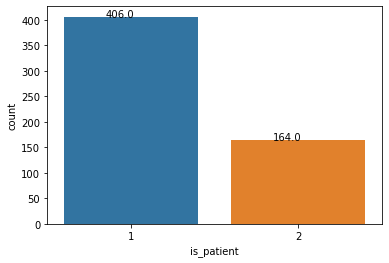

In [17]:
ax = sns.countplot(x= 'is_patient', data = data)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Number of liver patients(1) is more than non-liver patient(2)

### Checking the number of Male and Female patients with liver disease and without disease

<AxesSubplot:xlabel='gender', ylabel='count'>

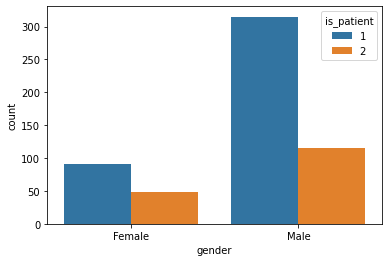

In [18]:
sns.countplot(x = 'gender', hue = 'is_patient', data = data)

From the above graph, we can see that Number of male patients are more than the Number of female patients.

## Converting categorical feature

In [19]:
data1 = pd.get_dummies(data['gender'], prefix="gender", drop_first = True)

In [20]:
data = pd.concat([data, data1], axis = 1).drop(['gender'], axis = 1)

In [21]:
data

age  tot_bilirubin  direct_bilirubin  alkphos  sgpt  sgot  tot_proteins  \
0     65            0.7               0.1      187    16    18           6.8   
1     62           10.9               5.5      699    64   100           7.5   
2     62            7.3               4.1      490    60    68           7.0   
3     58            1.0               0.4      182    14    20           6.8   
4     72            3.9               2.0      195    27    59           7.3   
..   ...            ...               ...      ...   ...   ...           ...   
578   60            0.5               0.1      500    20    34           5.9   
579   40            0.6               0.1       98    35    31           6.0   
580   52            0.8               0.2      245    48    49           6.4   
581   31            1.3               0.5      184    29    32           6.8   
582   38            1.0               0.3      216    21    24           7.3   

     albumin  ag_ratio  is_patient  gender_Male  
0        3.3      0.90           1            0  
1        3.2      0.74           1            1  
2        3.3      0.89           1            1  
3        3.4      1.00           1            1  
4        2.4      0.40           1            1  
..       ...       ...         ...          ...  
578      1.6      0.37           2            1  
579      3.2      1.10           1            1  
580      3.2      1.00           1            1  
581      3.4      1.00           1            1  
582      4.4      1.50           2            1  

[570 rows x 11 columns]

### Rearranging the features  

In [22]:
data=data.reindex(columns=["age","gender_Male","tot_bilirubin","direct_bilirubin","alkphos","sgpt","sgot","tot_proteins","albumin","ag_ratio","is_patient"])

In [23]:
data

age  gender_Male  tot_bilirubin  direct_bilirubin  alkphos  sgpt  sgot  \
0     65            0            0.7               0.1      187    16    18   
1     62            1           10.9               5.5      699    64   100   
2     62            1            7.3               4.1      490    60    68   
3     58            1            1.0               0.4      182    14    20   
4     72            1            3.9               2.0      195    27    59   
..   ...          ...            ...               ...      ...   ...   ...   
578   60            1            0.5               0.1      500    20    34   
579   40            1            0.6               0.1       98    35    31   
580   52            1            0.8               0.2      245    48    49   
581   31            1            1.3               0.5      184    29    32   
582   38            1            1.0               0.3      216    21    24   

     tot_proteins  albumin  ag_ratio  is_patient  
0             6.8      3.3      0.90           1  
1             7.5      3.2      0.74           1  
2             7.0      3.3      0.89           1  
3             6.8      3.4      1.00           1  
4             7.3      2.4      0.40           1  
..            ...      ...       ...         ...  
578           5.9      1.6      0.37           2  
579           6.0      3.2      1.10           1  
580           6.4      3.2      1.00           1  
581           6.8      3.4      1.00           1  
582           7.3      4.4      1.50           2  

[570 rows x 11 columns]

#### converting is_patient values as 0 and 1, 0 means not a liver patient and 1 as liver patient 

In [24]:
data["is_patient"]=(data["is_patient"].replace(2, 0))

In [25]:
data

age  gender_Male  tot_bilirubin  direct_bilirubin  alkphos  sgpt  sgot  \
0     65            0            0.7               0.1      187    16    18   
1     62            1           10.9               5.5      699    64   100   
2     62            1            7.3               4.1      490    60    68   
3     58            1            1.0               0.4      182    14    20   
4     72            1            3.9               2.0      195    27    59   
..   ...          ...            ...               ...      ...   ...   ...   
578   60            1            0.5               0.1      500    20    34   
579   40            1            0.6               0.1       98    35    31   
580   52            1            0.8               0.2      245    48    49   
581   31            1            1.3               0.5      184    29    32   
582   38            1            1.0               0.3      216    21    24   

     tot_proteins  albumin  ag_ratio  is_patient  
0             6.8      3.3      0.90           1  
1             7.5      3.2      0.74           1  
2             7.0      3.3      0.89           1  
3             6.8      3.4      1.00           1  
4             7.3      2.4      0.40           1  
..            ...      ...       ...         ...  
578           5.9      1.6      0.37           0  
579           6.0      3.2      1.10           1  
580           6.4      3.2      1.00           1  
581           6.8      3.4      1.00           1  
582           7.3      4.4      1.50           0  

[570 rows x 11 columns]

# Data Visualization

### Checking number of male and female counts


([<matplotlib.patches.Wedge at 0x1b927a14700>,
 [Text(-0.7884607241685501, 0.7670265226467763, 'male'),
  Text(0.7884606882614467, -0.7670265595572855, 'female')],
 [Text(-0.4300694859101182, 0.4183781032618779, '75.44'),
  Text(0.4300694663244254, -0.41837812339488295, '24.56')])

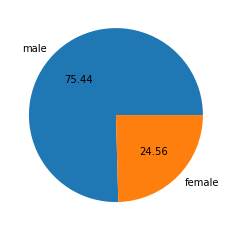

In [26]:
plt.pie(data.gender_Male.value_counts(),autopct="%0.2f",labels=["male","female"])

From the above graph we can see that 75% are Male and 25% are Female

### Compare data distributed between Total and Direct Bilirubin

<AxesSubplot:xlabel='tot_bilirubin', ylabel='direct_bilirubin'>

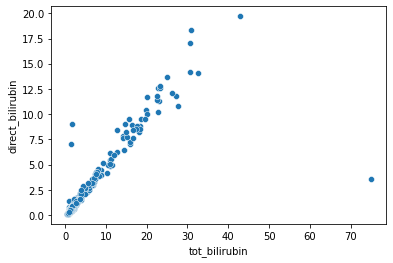

In [27]:
sns.scatterplot(x = data['tot_bilirubin'], y = data['direct_bilirubin'], data = data)

Total and Direct Bilirubin is lineraly distributed

### Lets check the age group of patients

<AxesSubplot:>

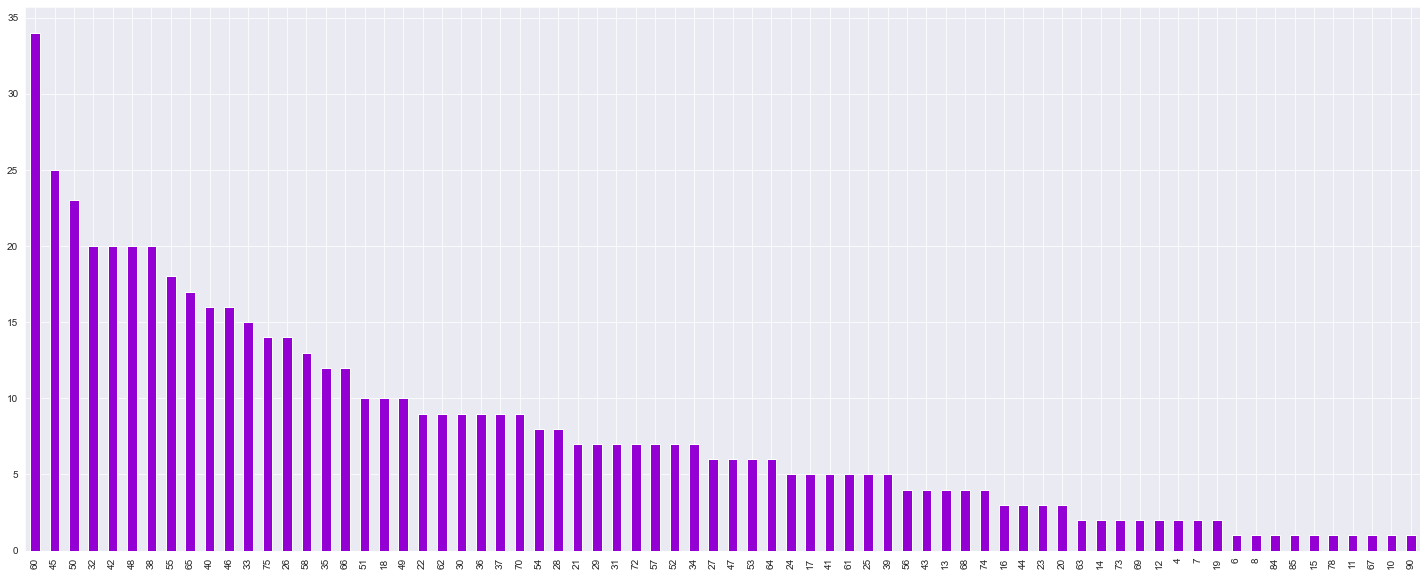

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
data['age'].value_counts().plot.bar(color='darkviolet')

Age group of 60 is more compared to other age groups

### Let us view the pairplot of patients based on Gender.



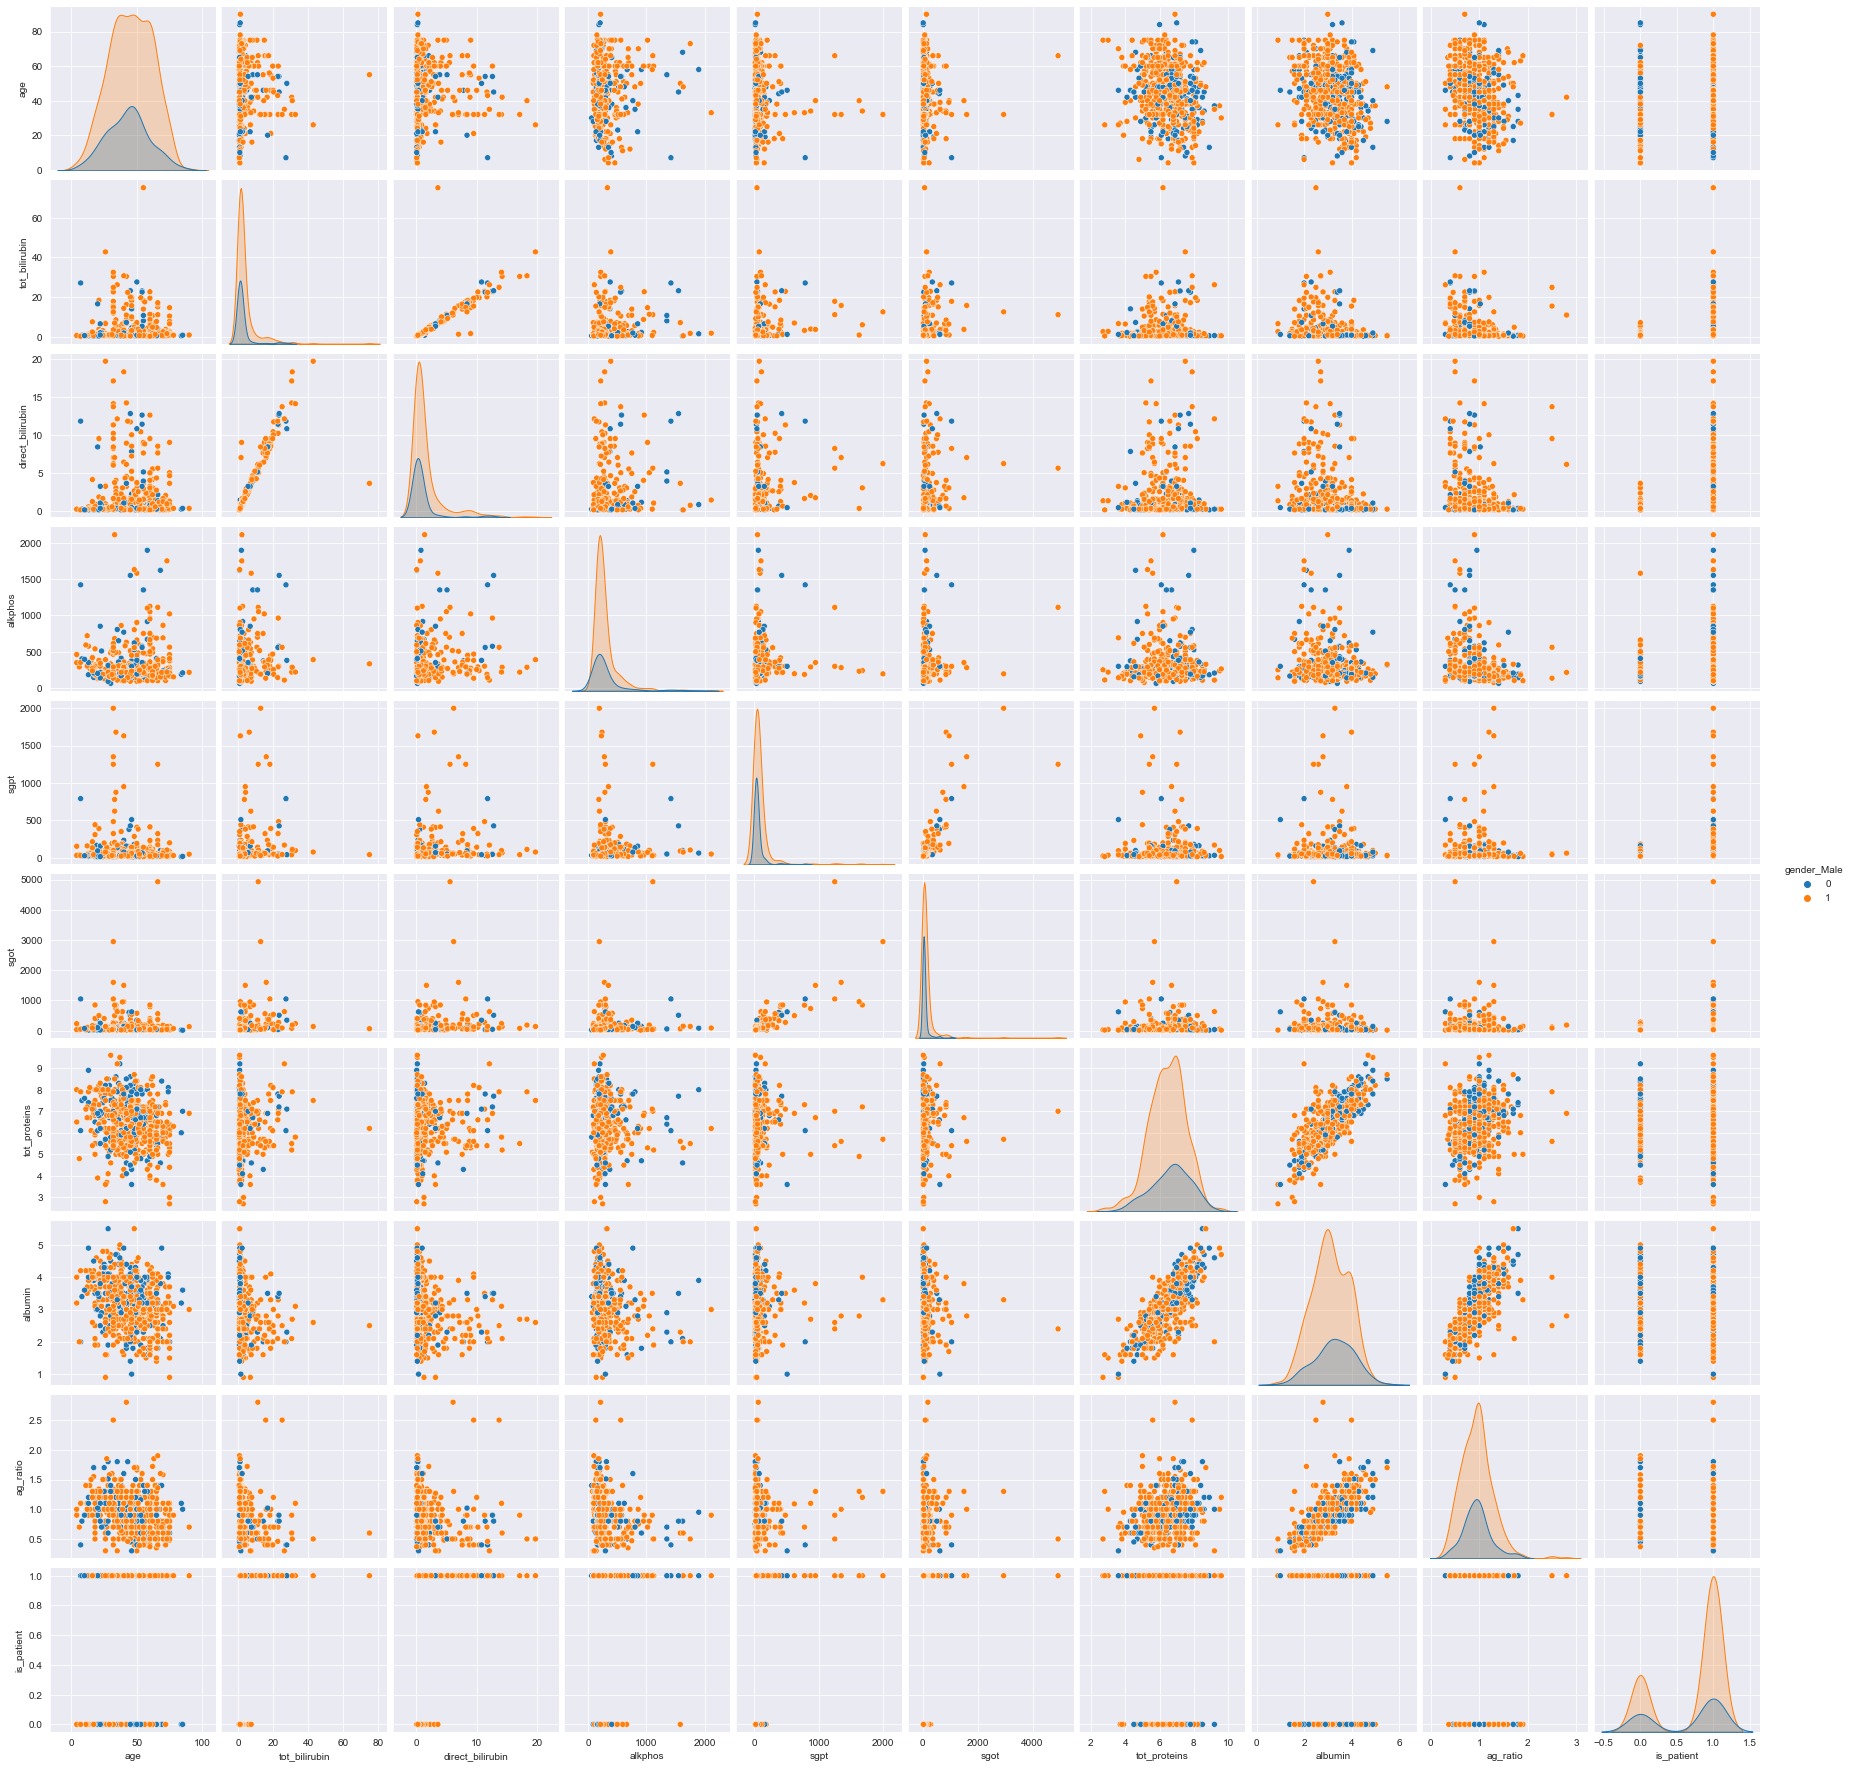

In [29]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(data,hue='gender_Male')

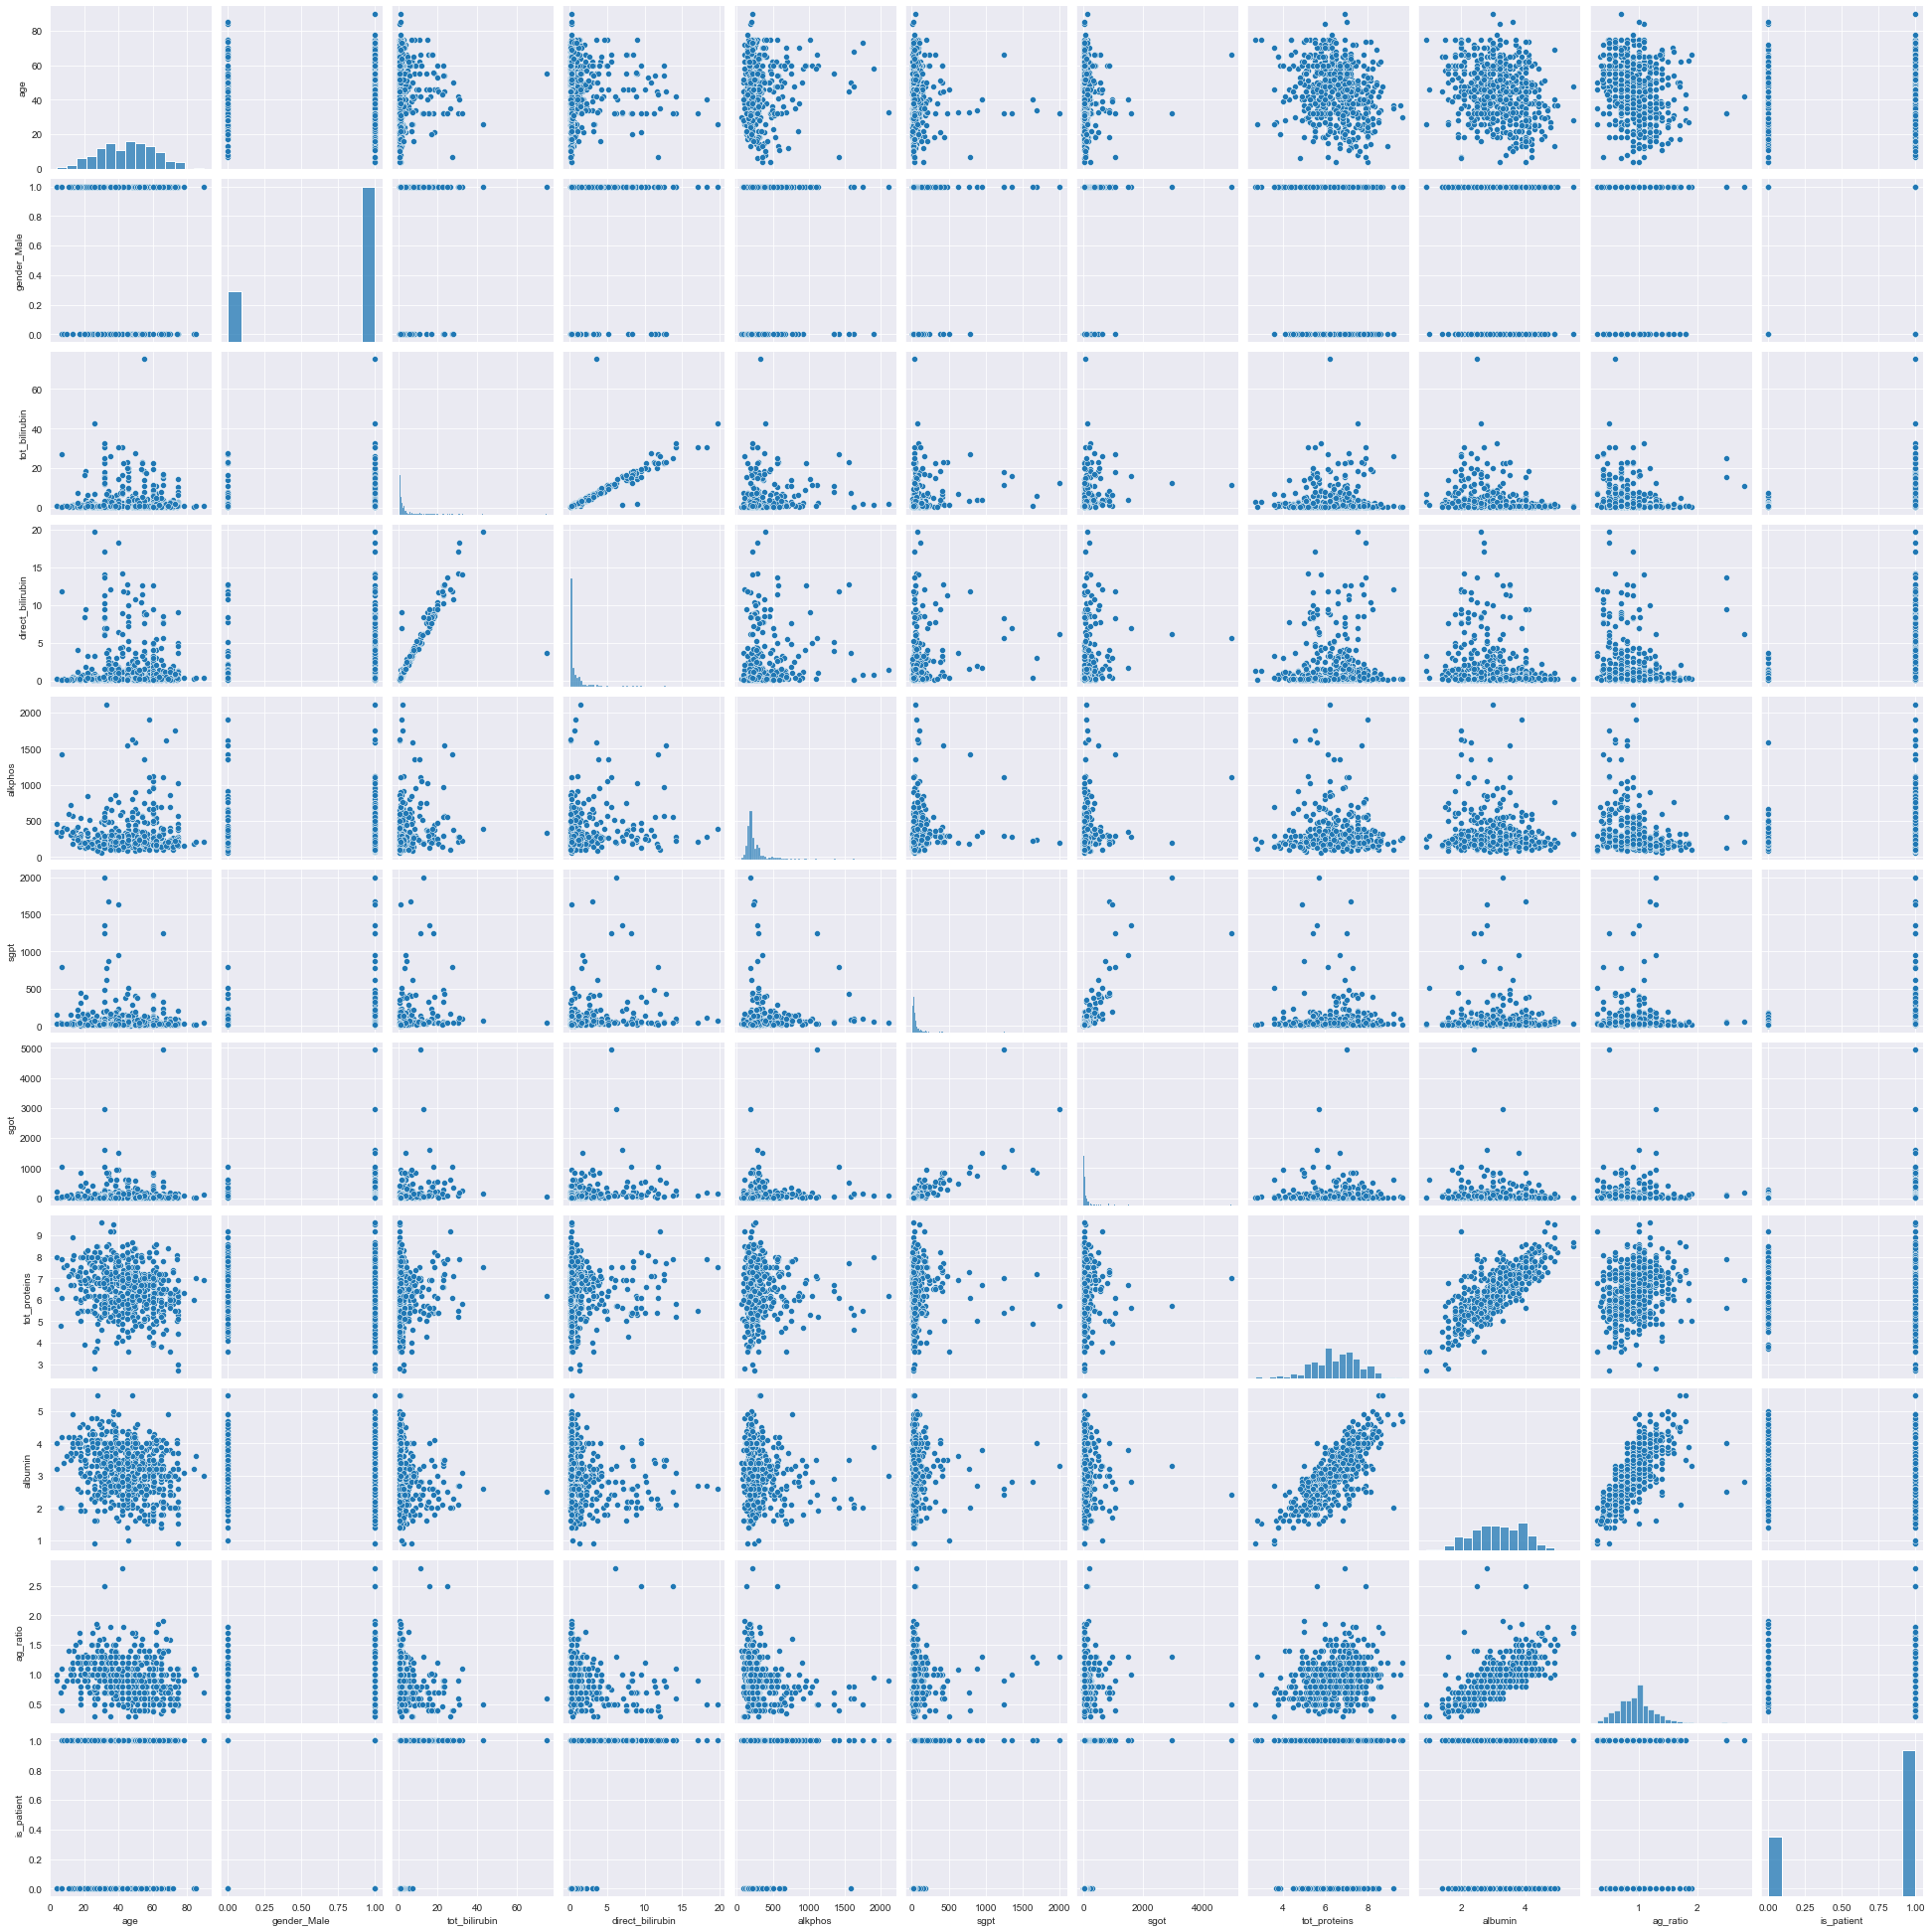

In [30]:
sns.pairplot(data)

### Relation between sgpt and sgot

<AxesSubplot:xlabel='sgpt', ylabel='sgot'>

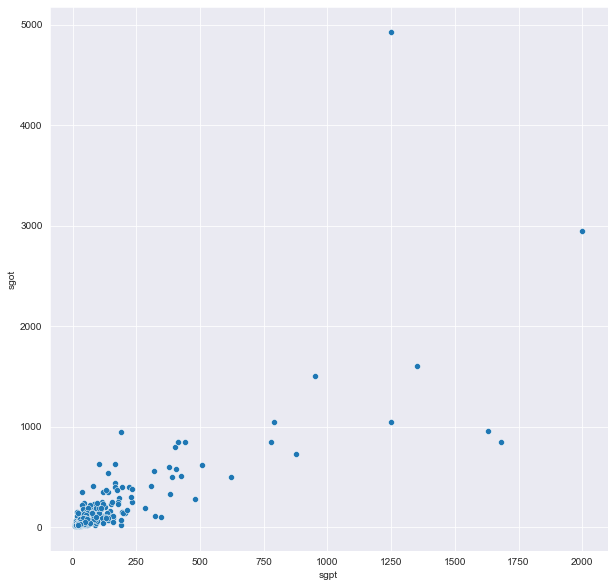

In [31]:
sns.scatterplot(x = data['sgpt'], y = data['sgot'], data = data)

### Relation between Total Proteins and Albumin with respect to ag ratio

<AxesSubplot:xlabel='tot_proteins', ylabel='albumin'>

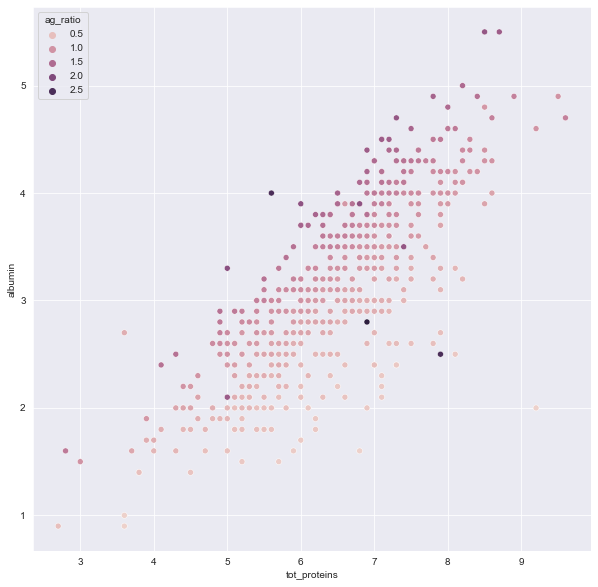

In [32]:
sns.scatterplot(x = data['tot_proteins'], y = data['albumin'], hue = data['ag_ratio'], data = data)

### Let us compare the Gender based on the Protein Intake.



<AxesSubplot:xlabel='gender_Male'>

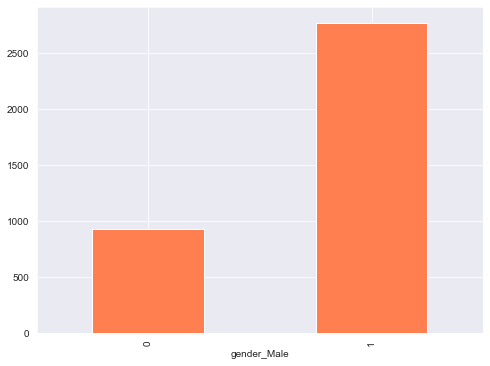

In [33]:
plt.figure(figsize=(8,6))
data.groupby('gender_Male').sum()["tot_proteins"].plot.bar(color='coral')

### So protein intake is higher in the case of Male and comparitively less in females.

### Let us compare male and female based on Albumin Level.

<AxesSubplot:xlabel='gender_Male'>

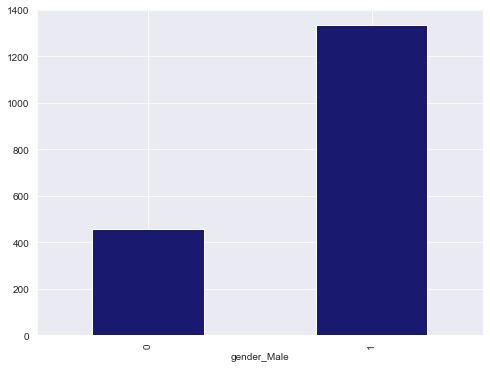

In [34]:
plt.figure(figsize=(8,6))
data.groupby('gender_Male').sum()['albumin'].plot.bar(color='midnightblue')

### Albumin Level is higher in the case in the case of male compared to female.



### Finally Let us compare them based on the Bilirubin content.



<AxesSubplot:xlabel='gender_Male'>

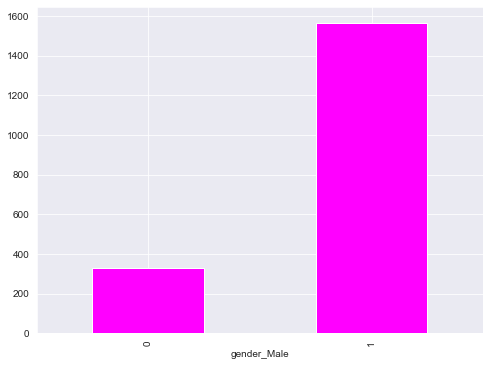

In [35]:
plt.figure(figsize=(8,6))
data.groupby('gender_Male').sum()['tot_bilirubin'].plot.bar(color='fuchsia')

### We can clearly see that males has more bilirubin content compared to females.




### Another point to be noted here is that higher the Bilirubin content, higher the case is prone to Liver disease.


# Feature Selection

### Let us check the correlation between the features using a heatmap:

<AxesSubplot:>

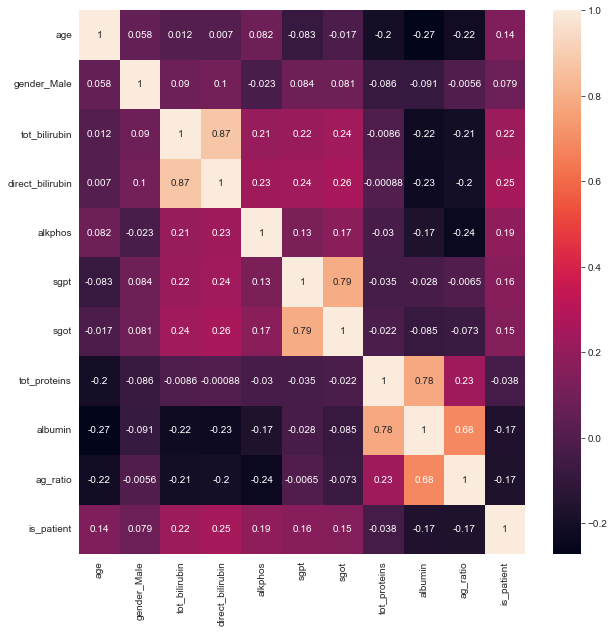

In [36]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)

Text(0.5, 1.0, 'Patient Correlation Coeffecients')

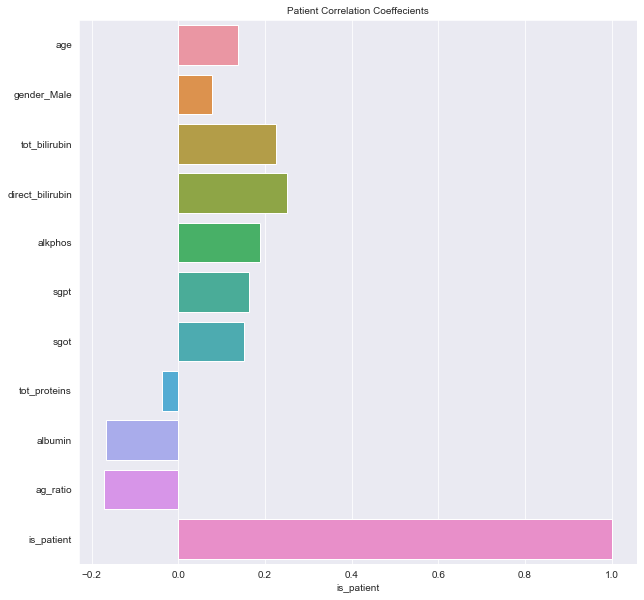

In [37]:
correlation = pd.DataFrame(data.corr()['is_patient'])
correlation_x = correlation.index
correlation_y = correlation['is_patient']
sns.barplot(x=correlation_y,y=correlation_x).set_title('Patient Correlation Coeffecients', size='10')

From the above graph, we find that no features are highly corelated with each other

# Exploratory Data Analysis (EDA)

### Univarient Analysis using sweetwiz

                                             |                                             | [  0%]   00:00 ->…


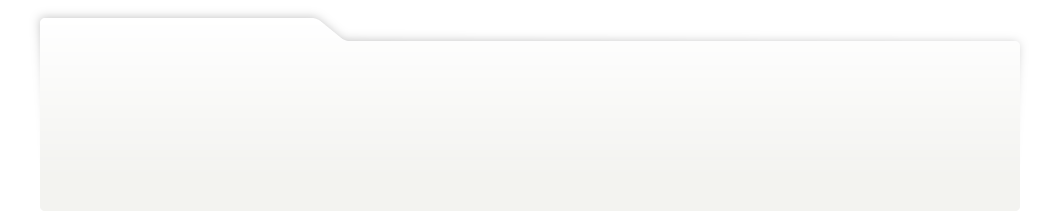
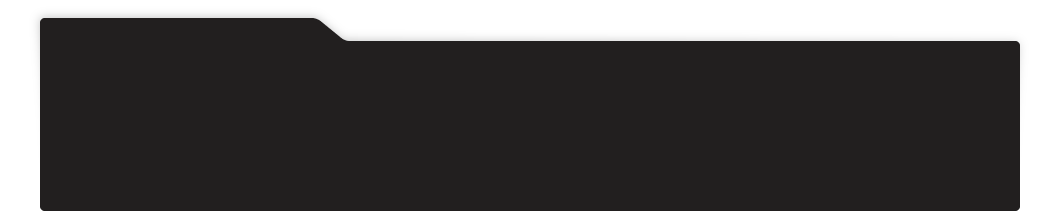
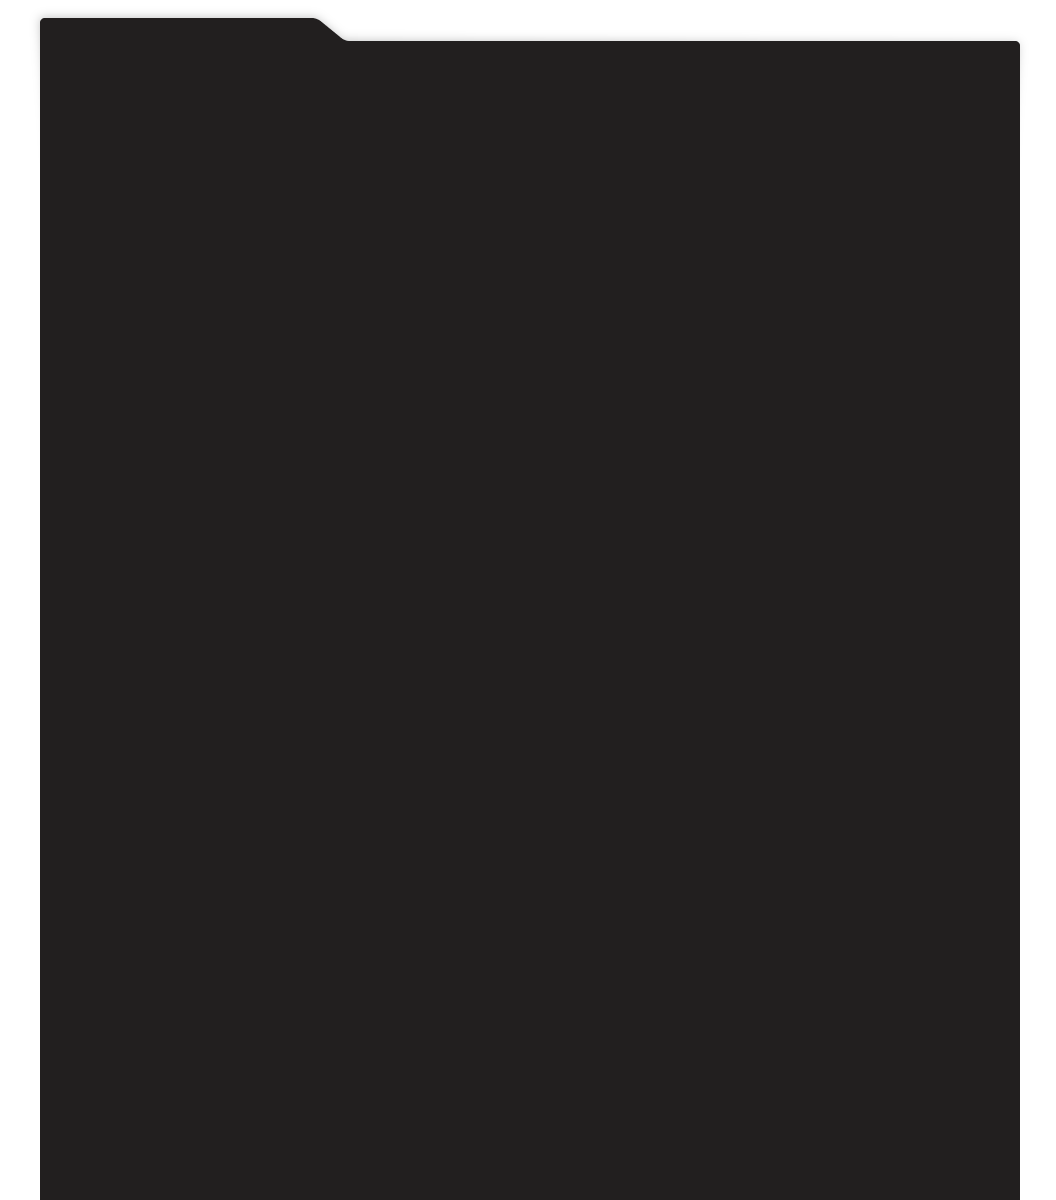
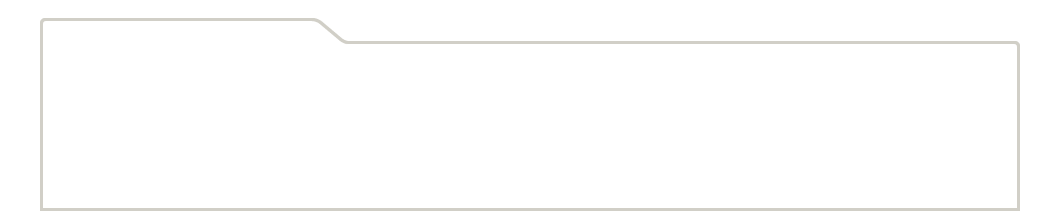
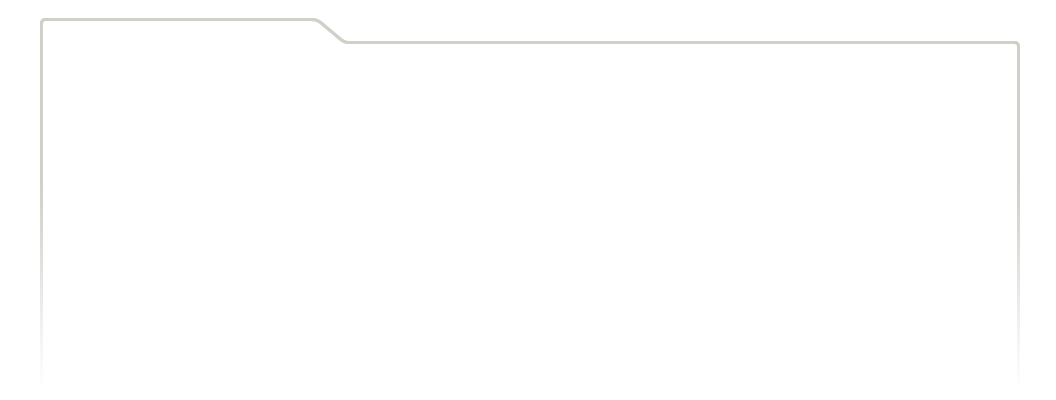
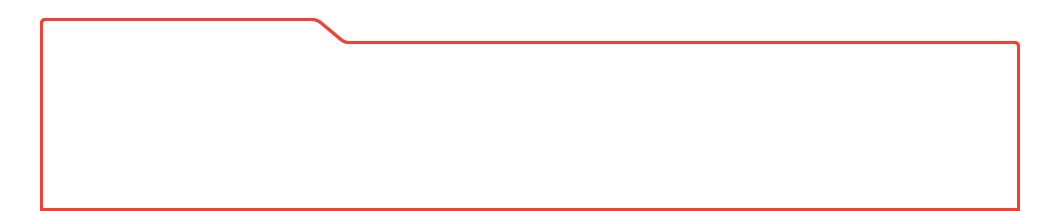
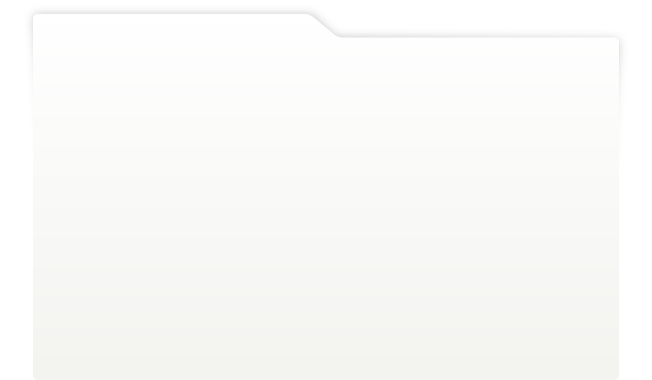
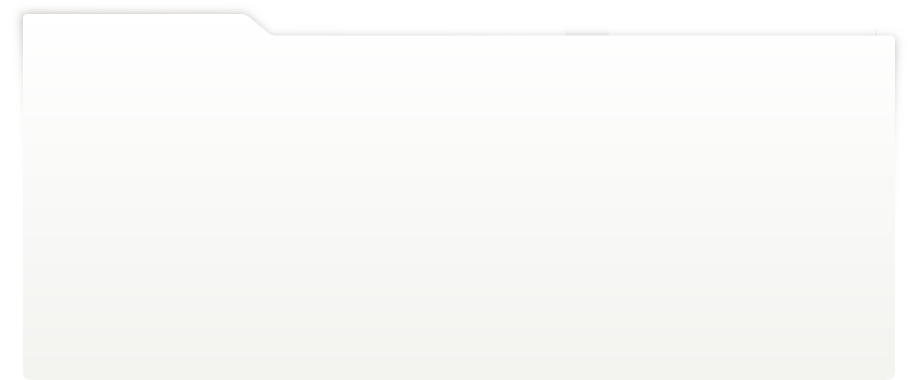
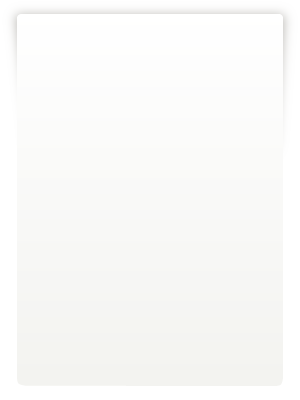
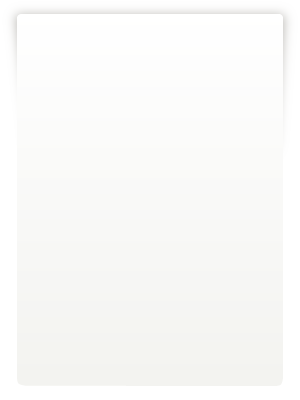
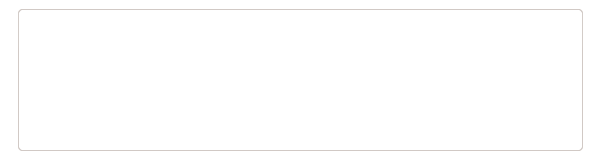
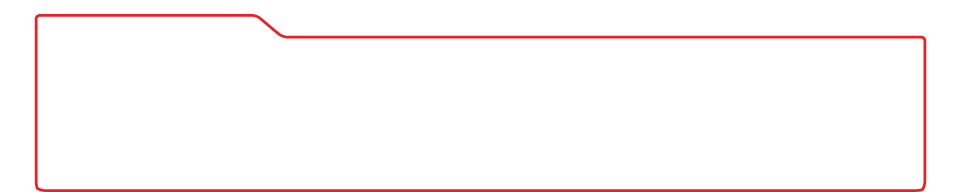
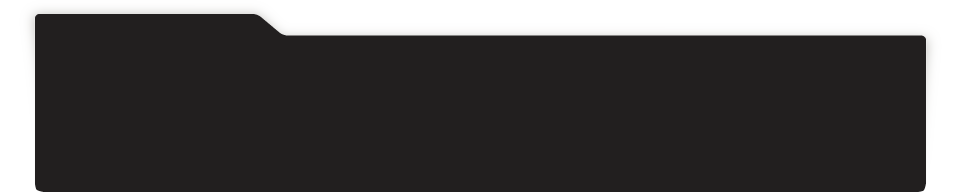
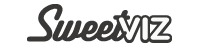
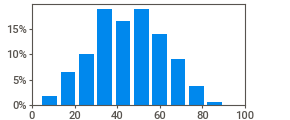
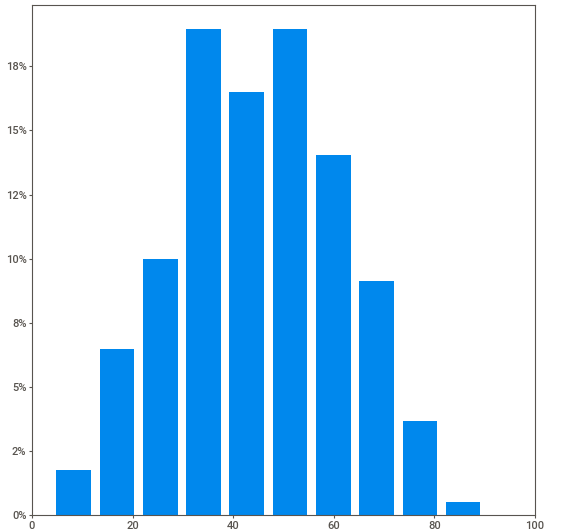
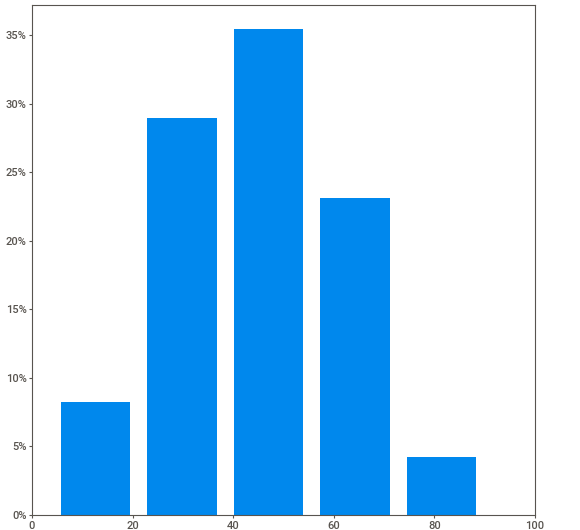
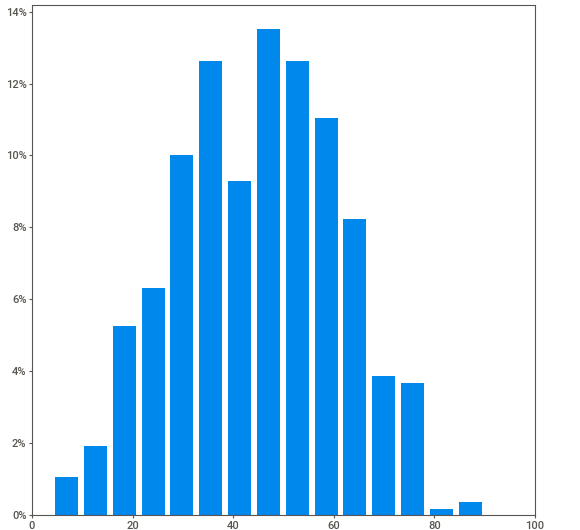
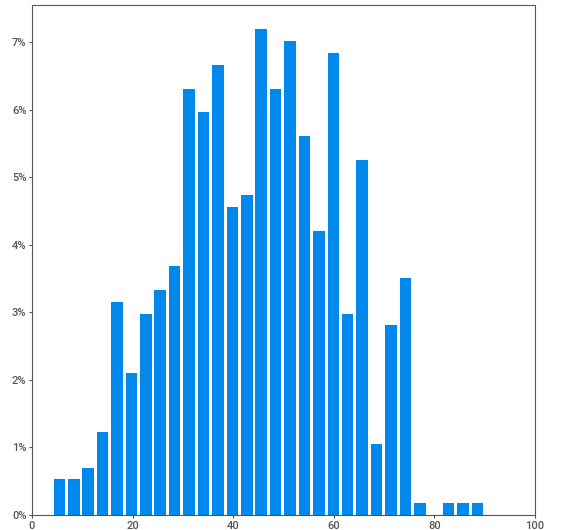
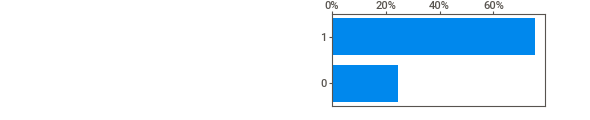
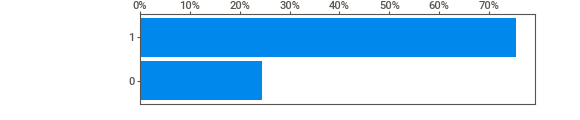
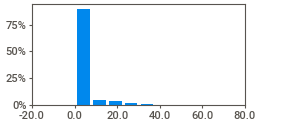
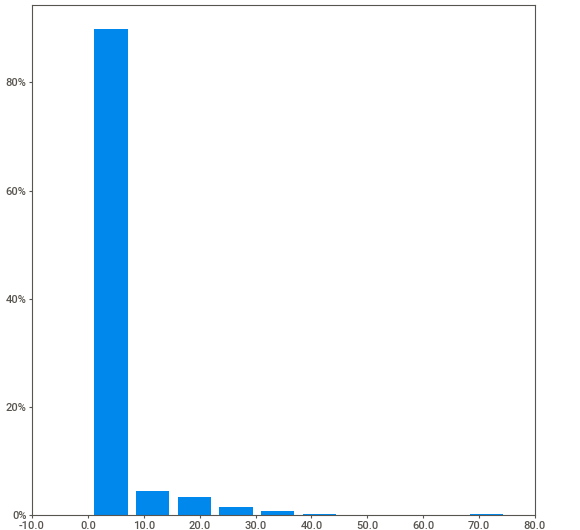
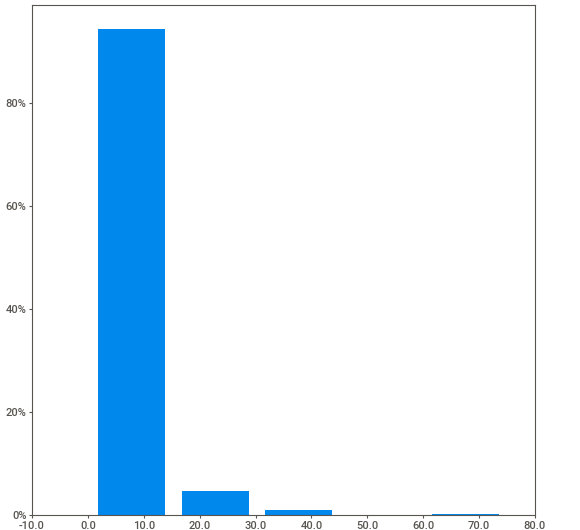
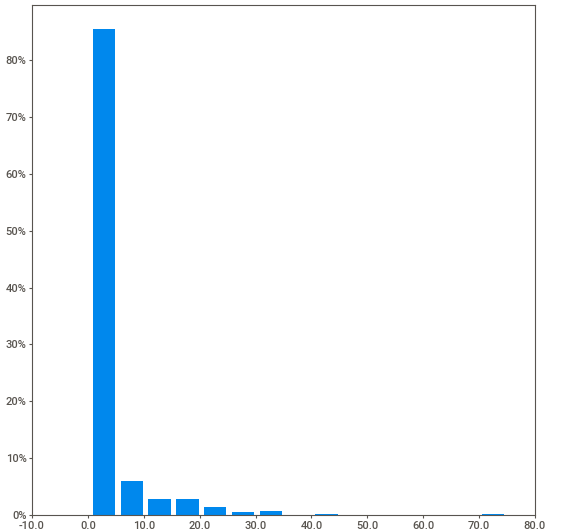
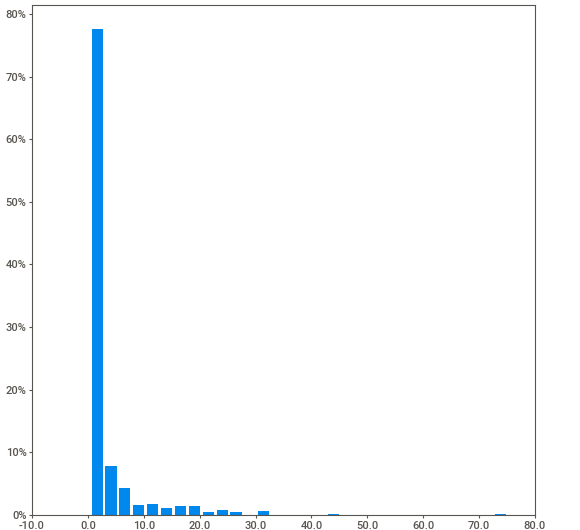
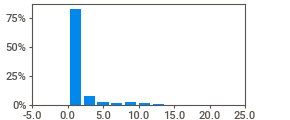
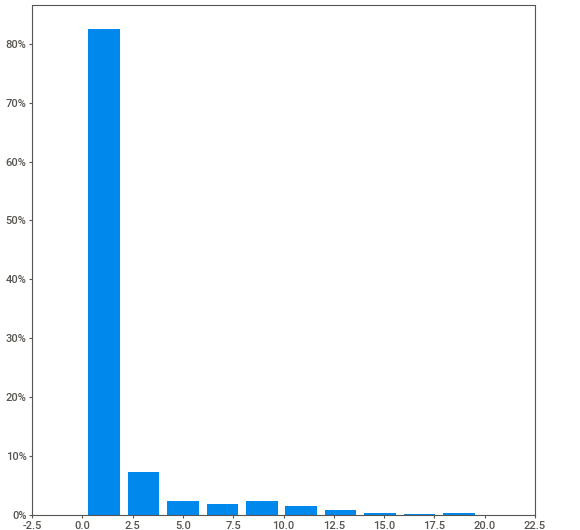
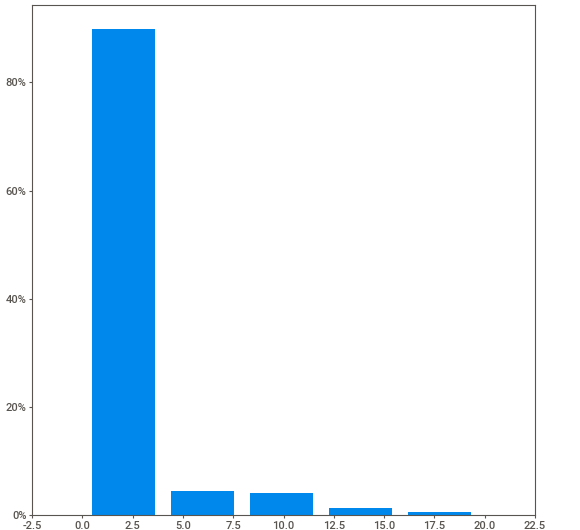
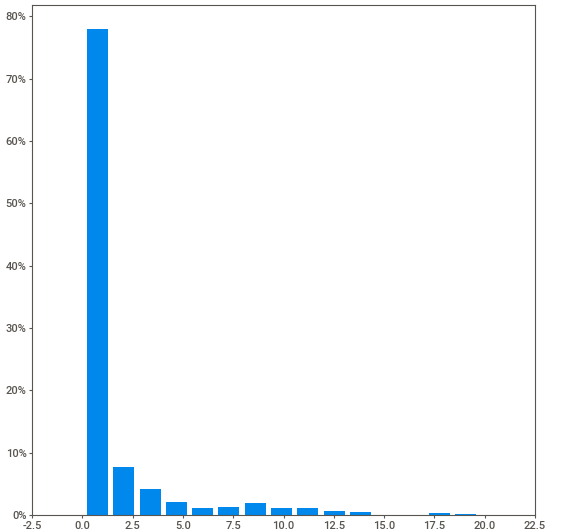
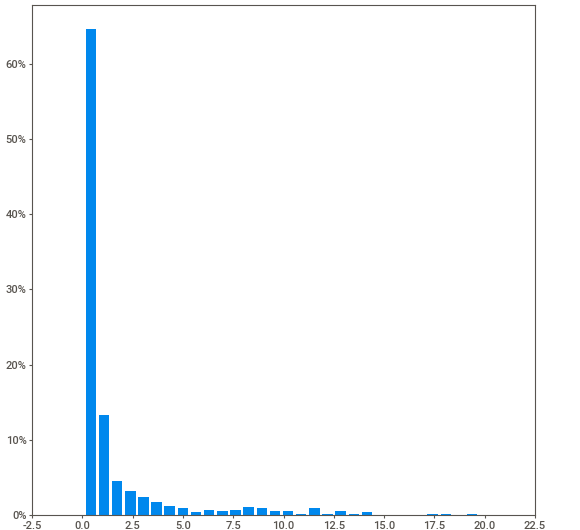
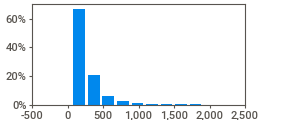
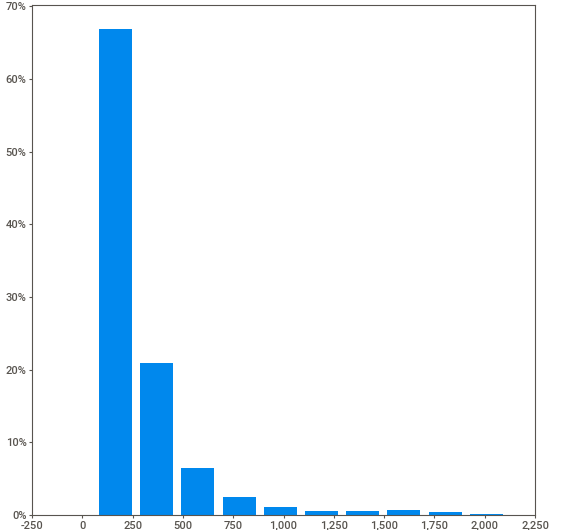
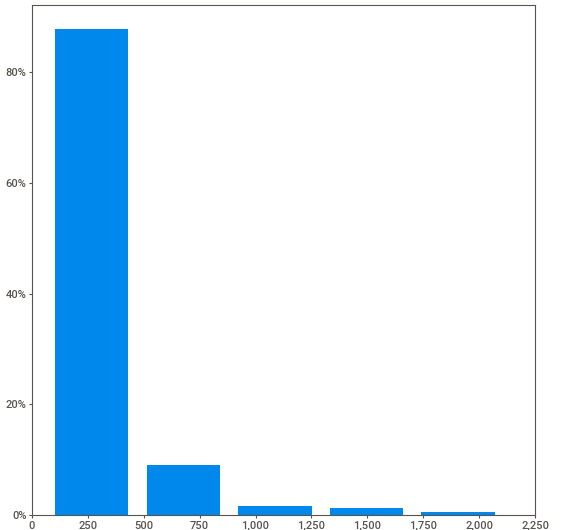
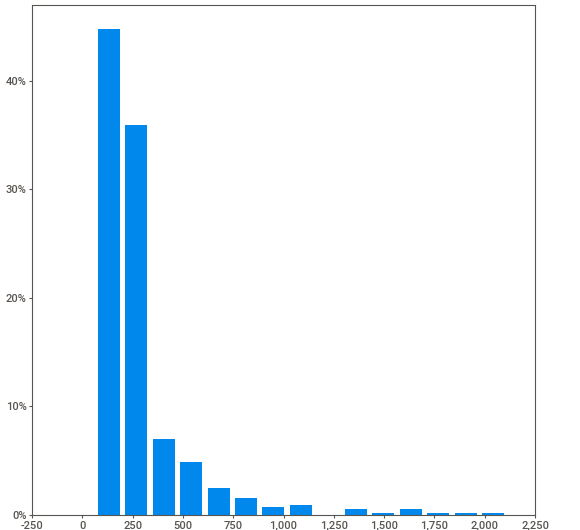
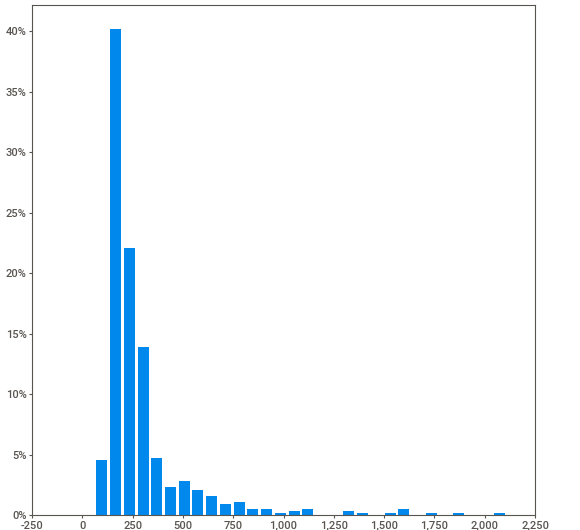
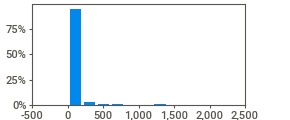
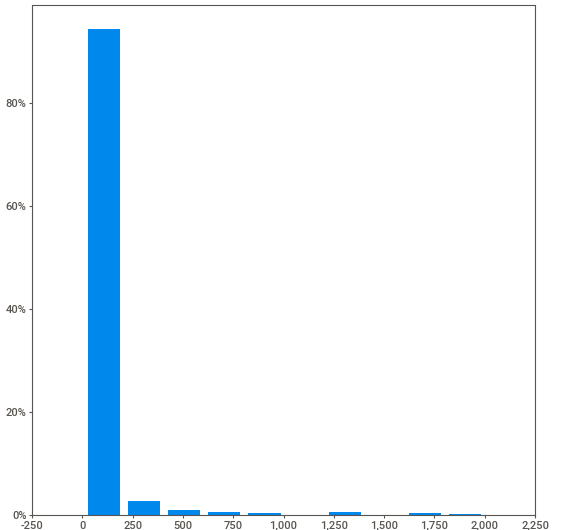
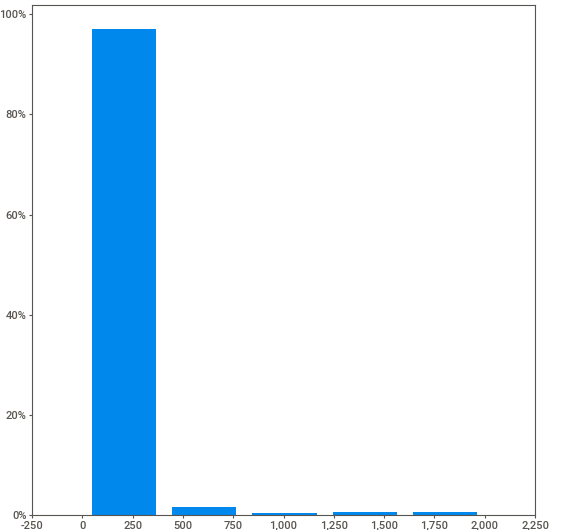
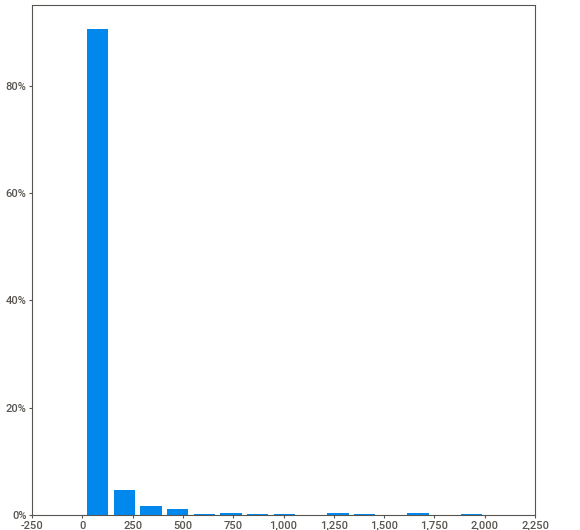
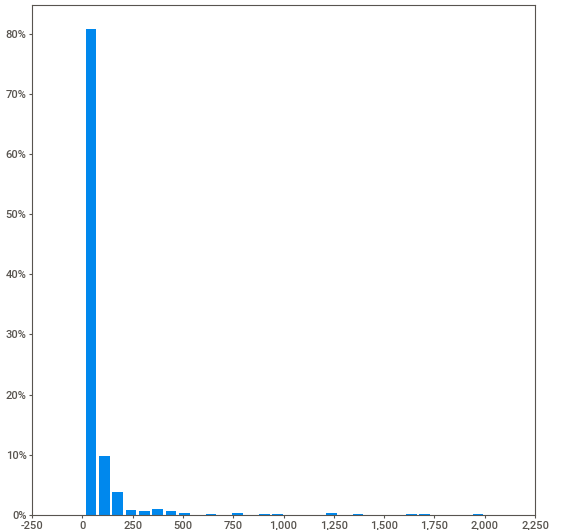
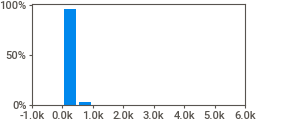
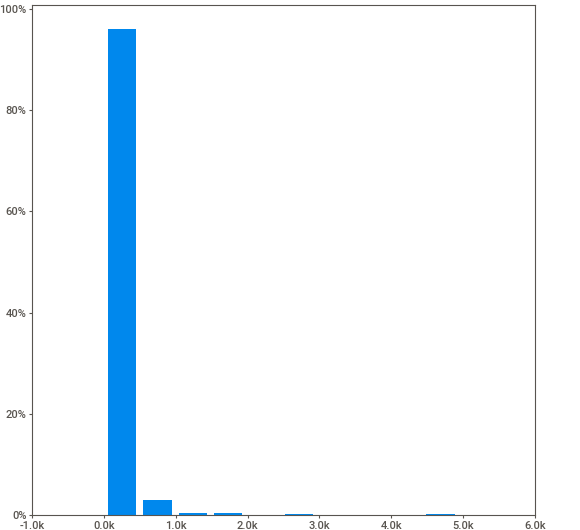
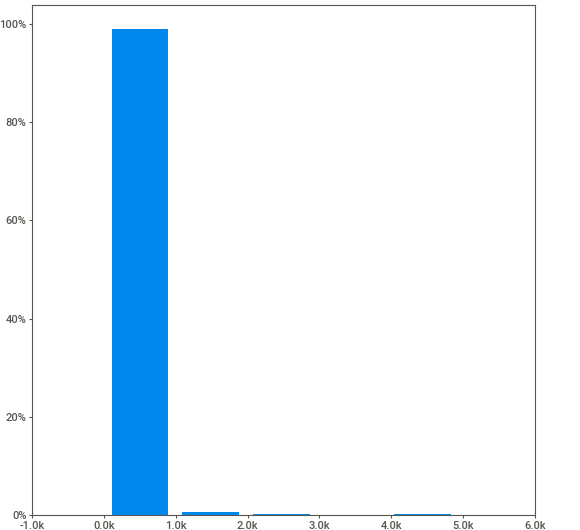
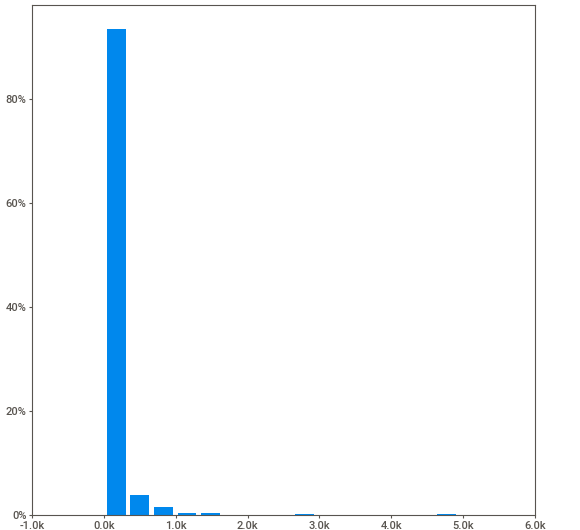
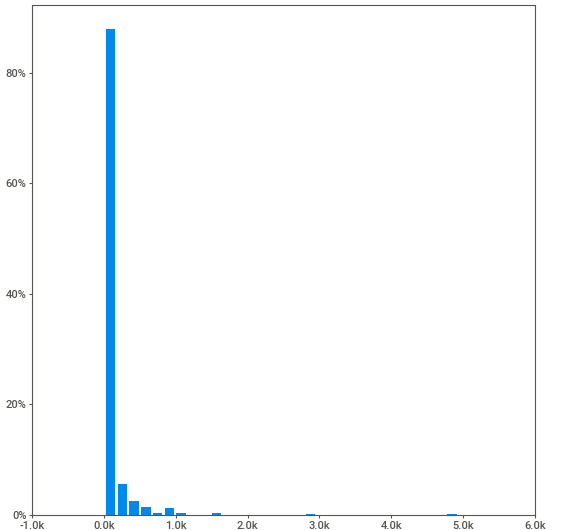
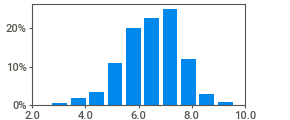
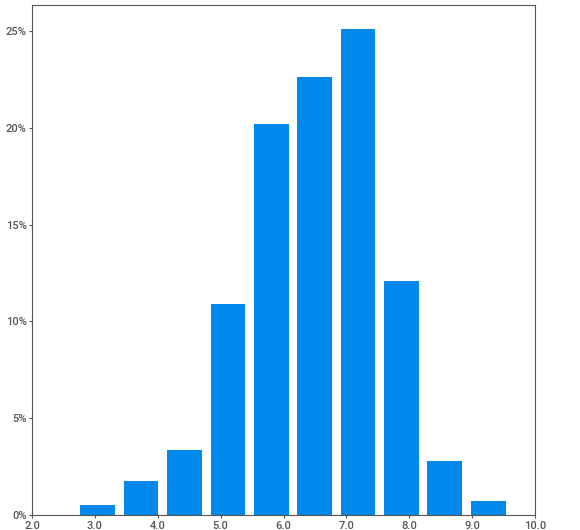
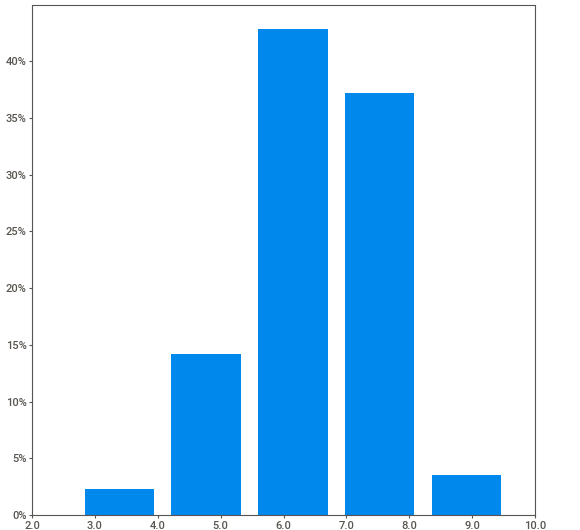
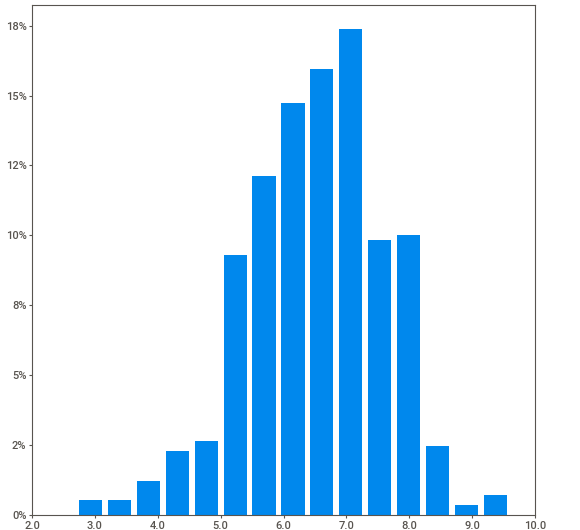
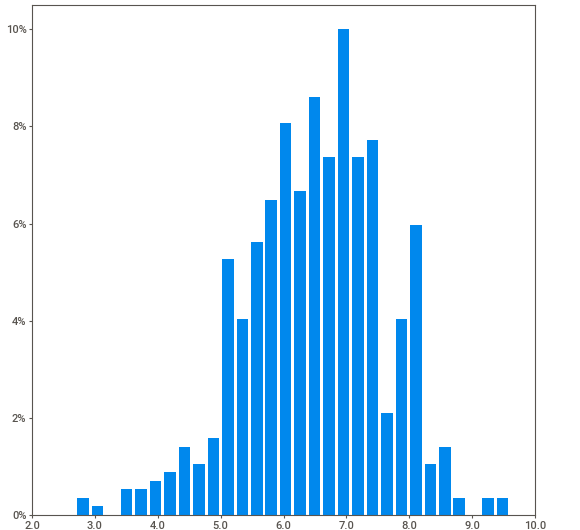
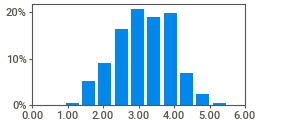
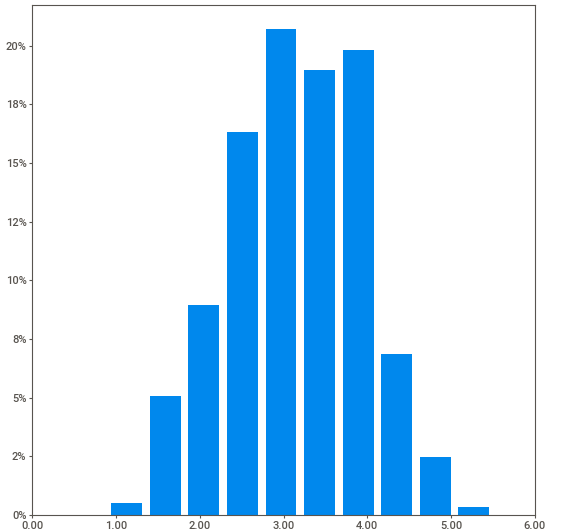
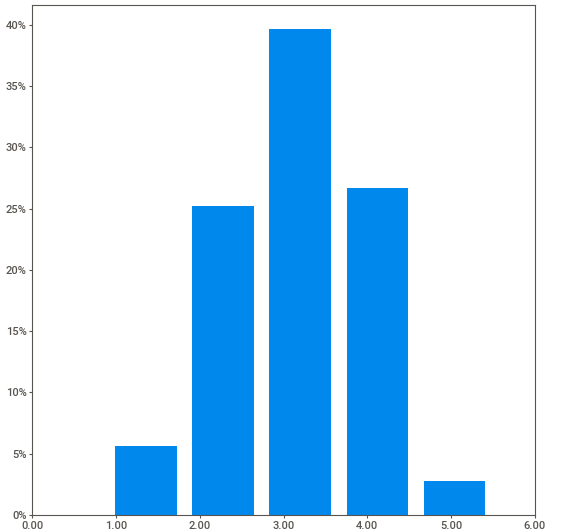
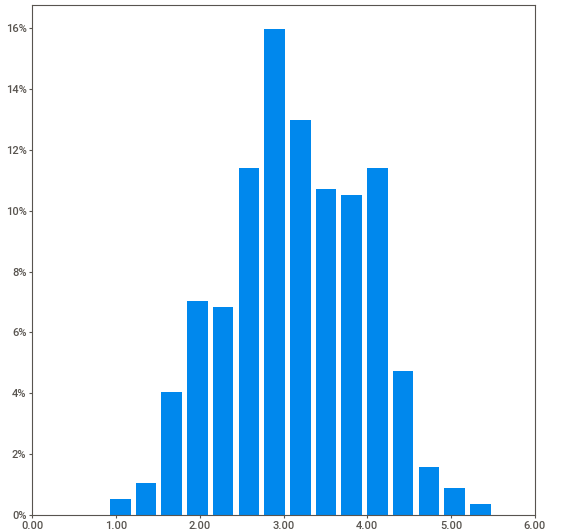
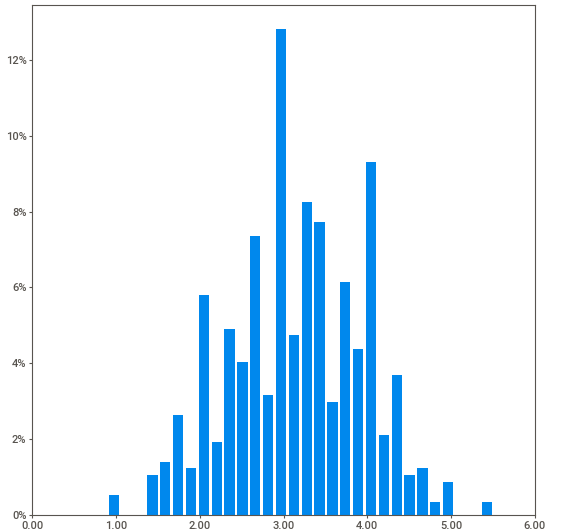
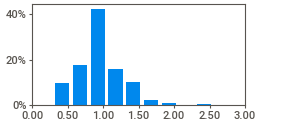
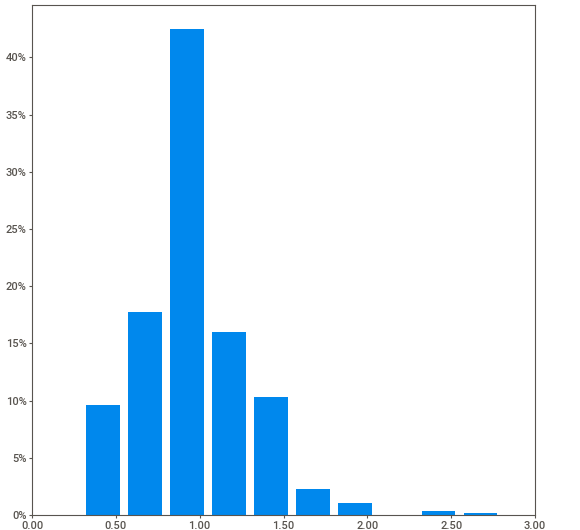
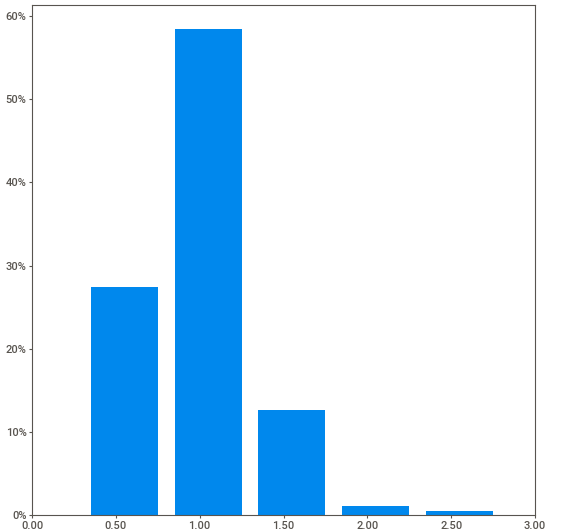
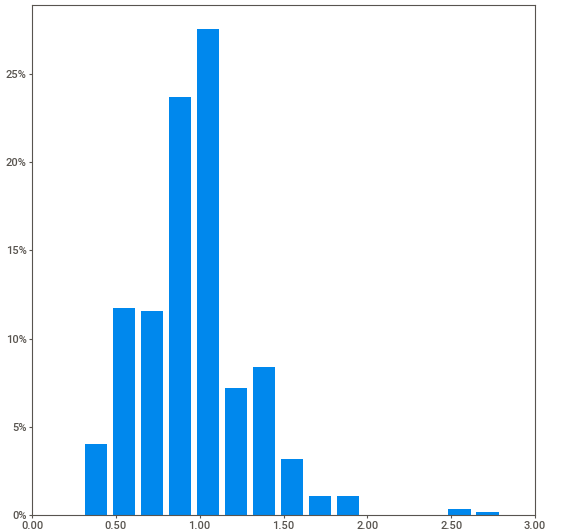
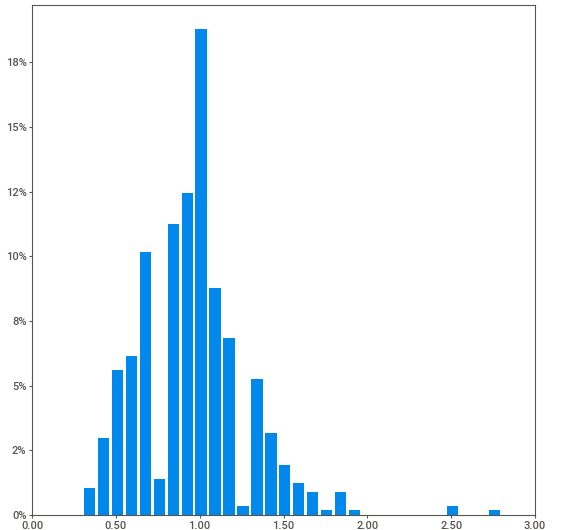
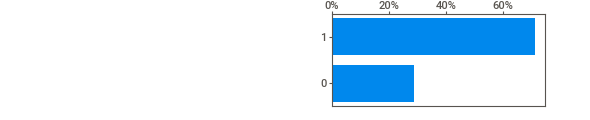
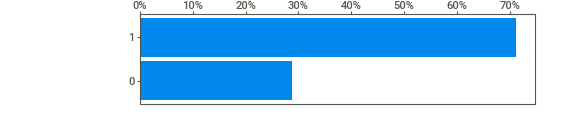
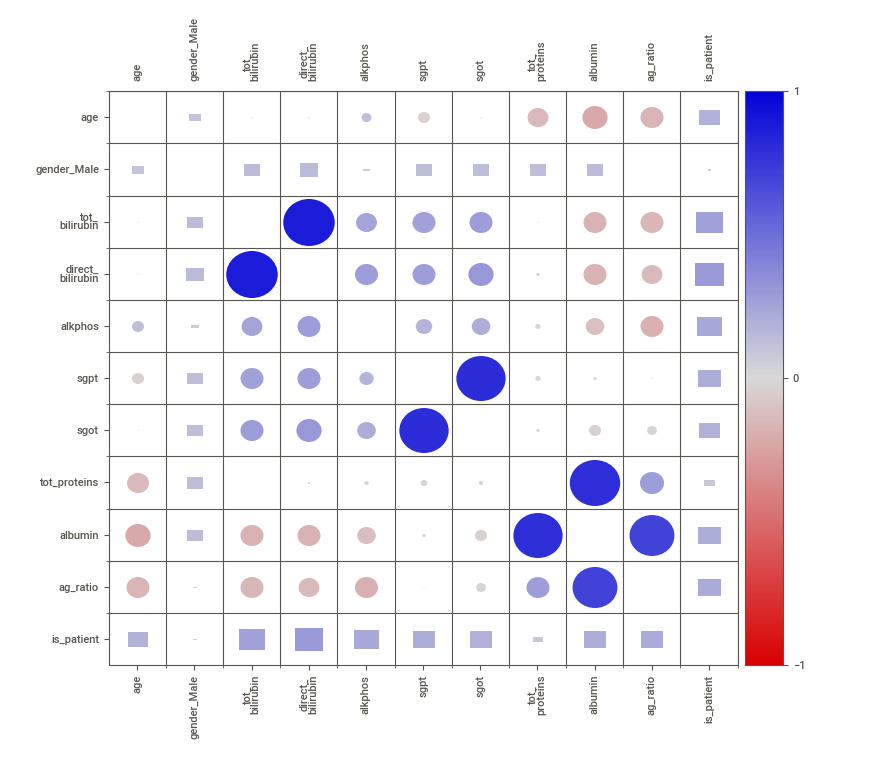
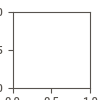

In [38]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_notebook()

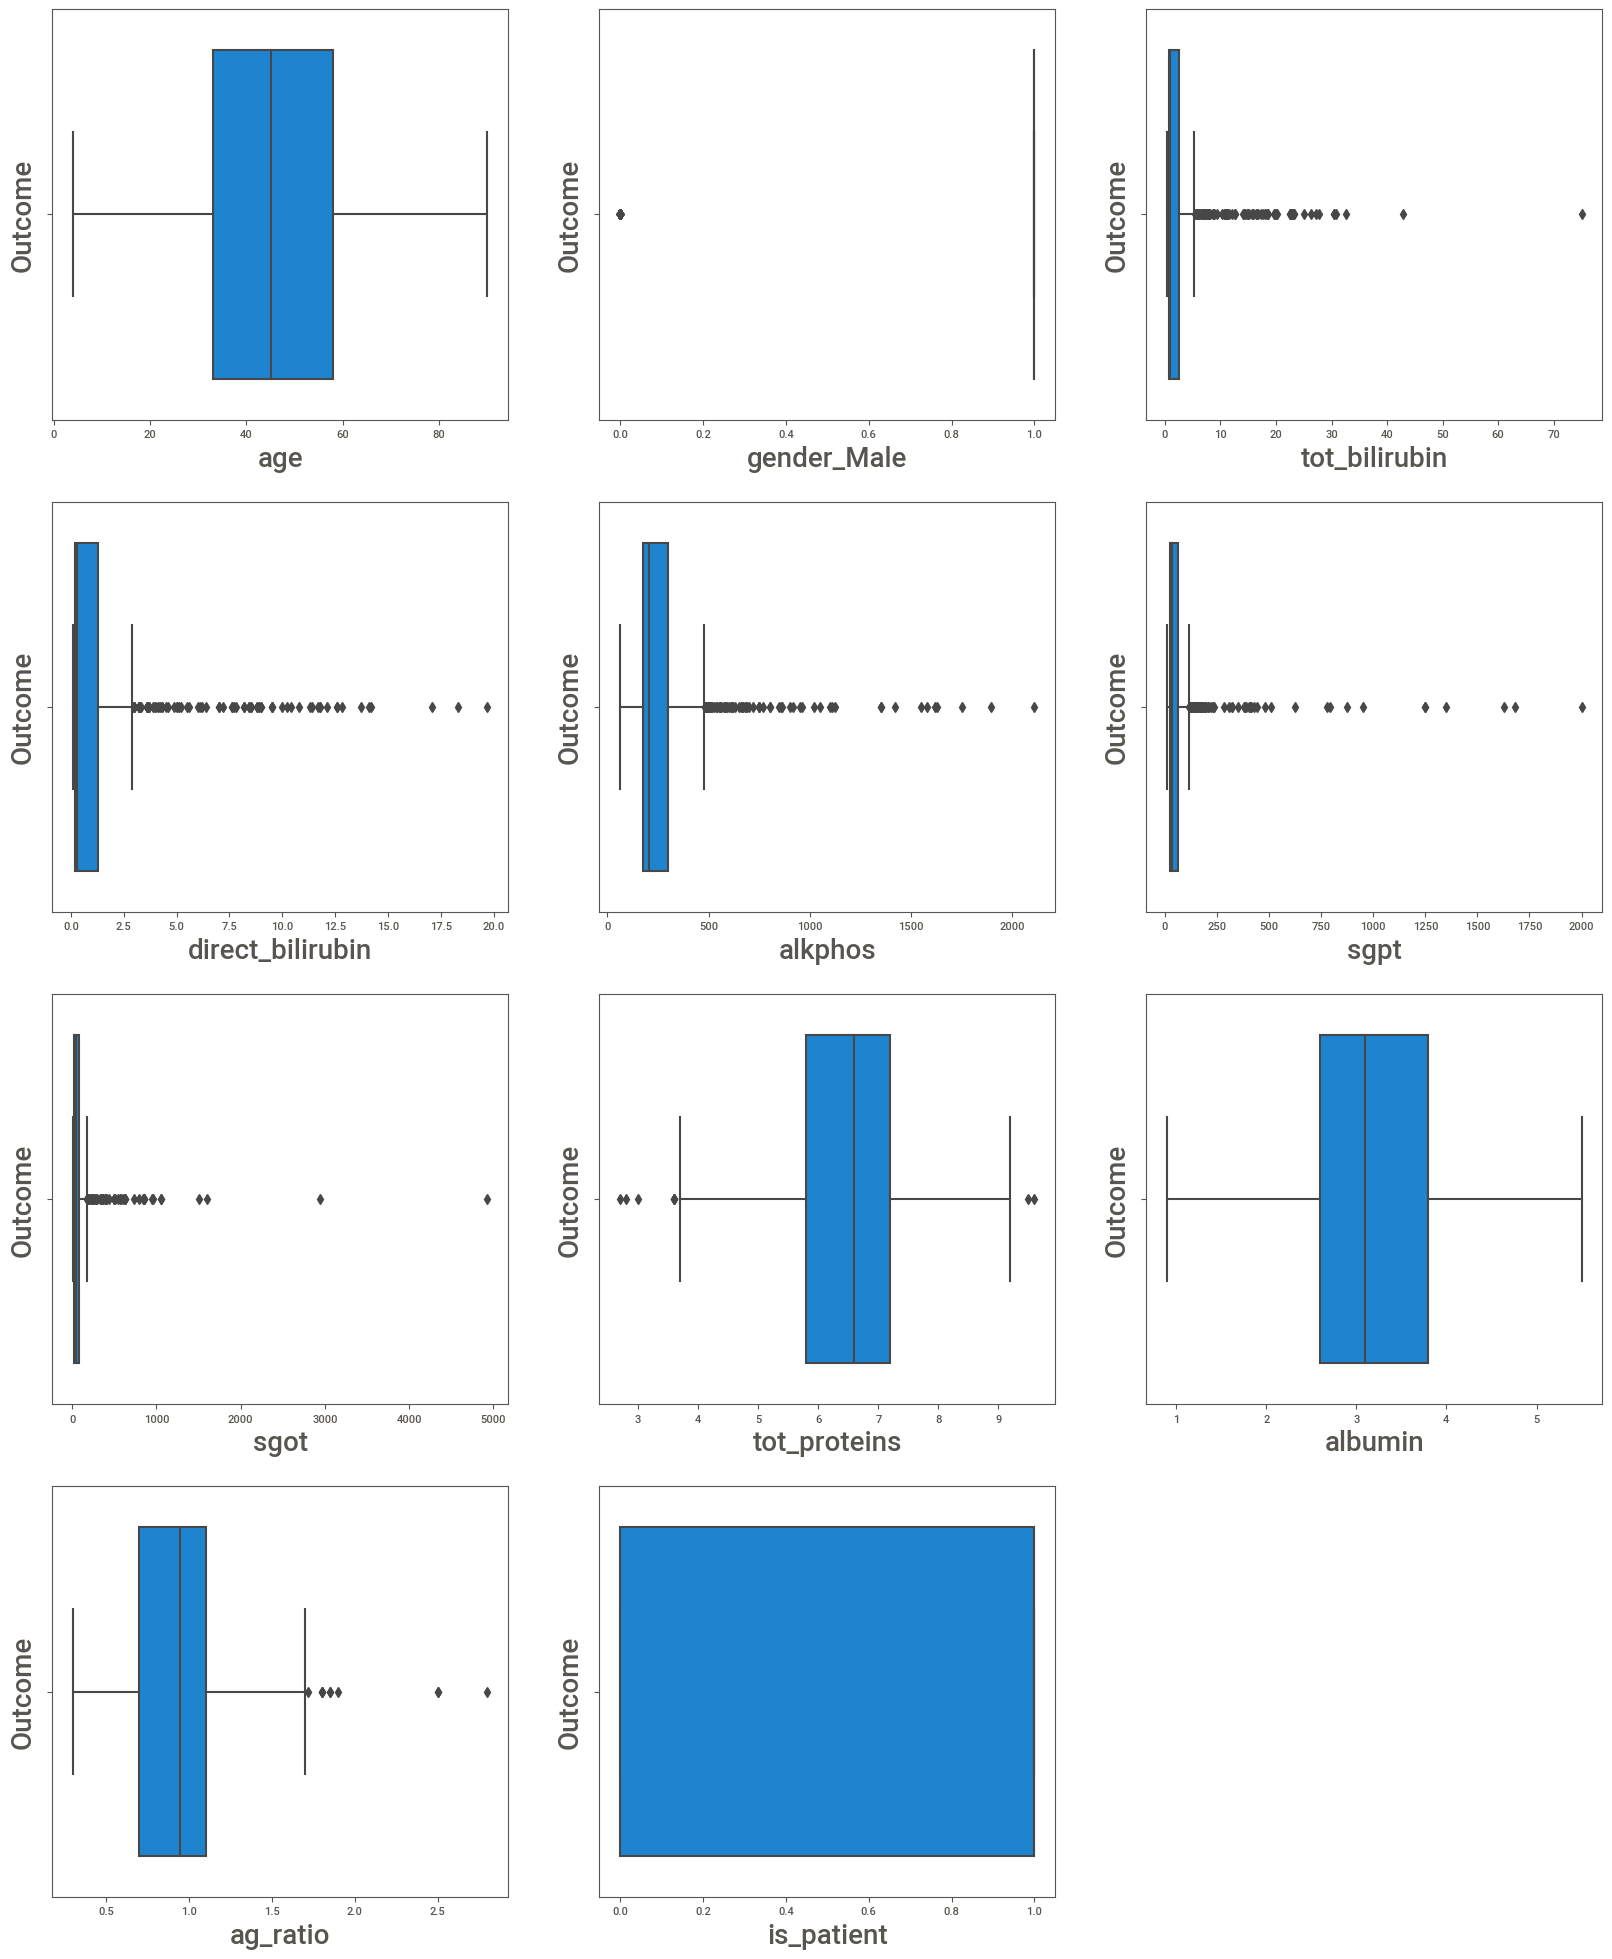

In [39]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in data.columns:
    if plotnumber <= 12:
        ax = plt.subplot (4, 3, plotnumber)
        sns.boxplot(x = data[column])
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Outcome', fontsize = 20)
    plotnumber += 1
plt.show()

#### In the above graph we can understand that their are outliers, but we can not delete/replace the data.

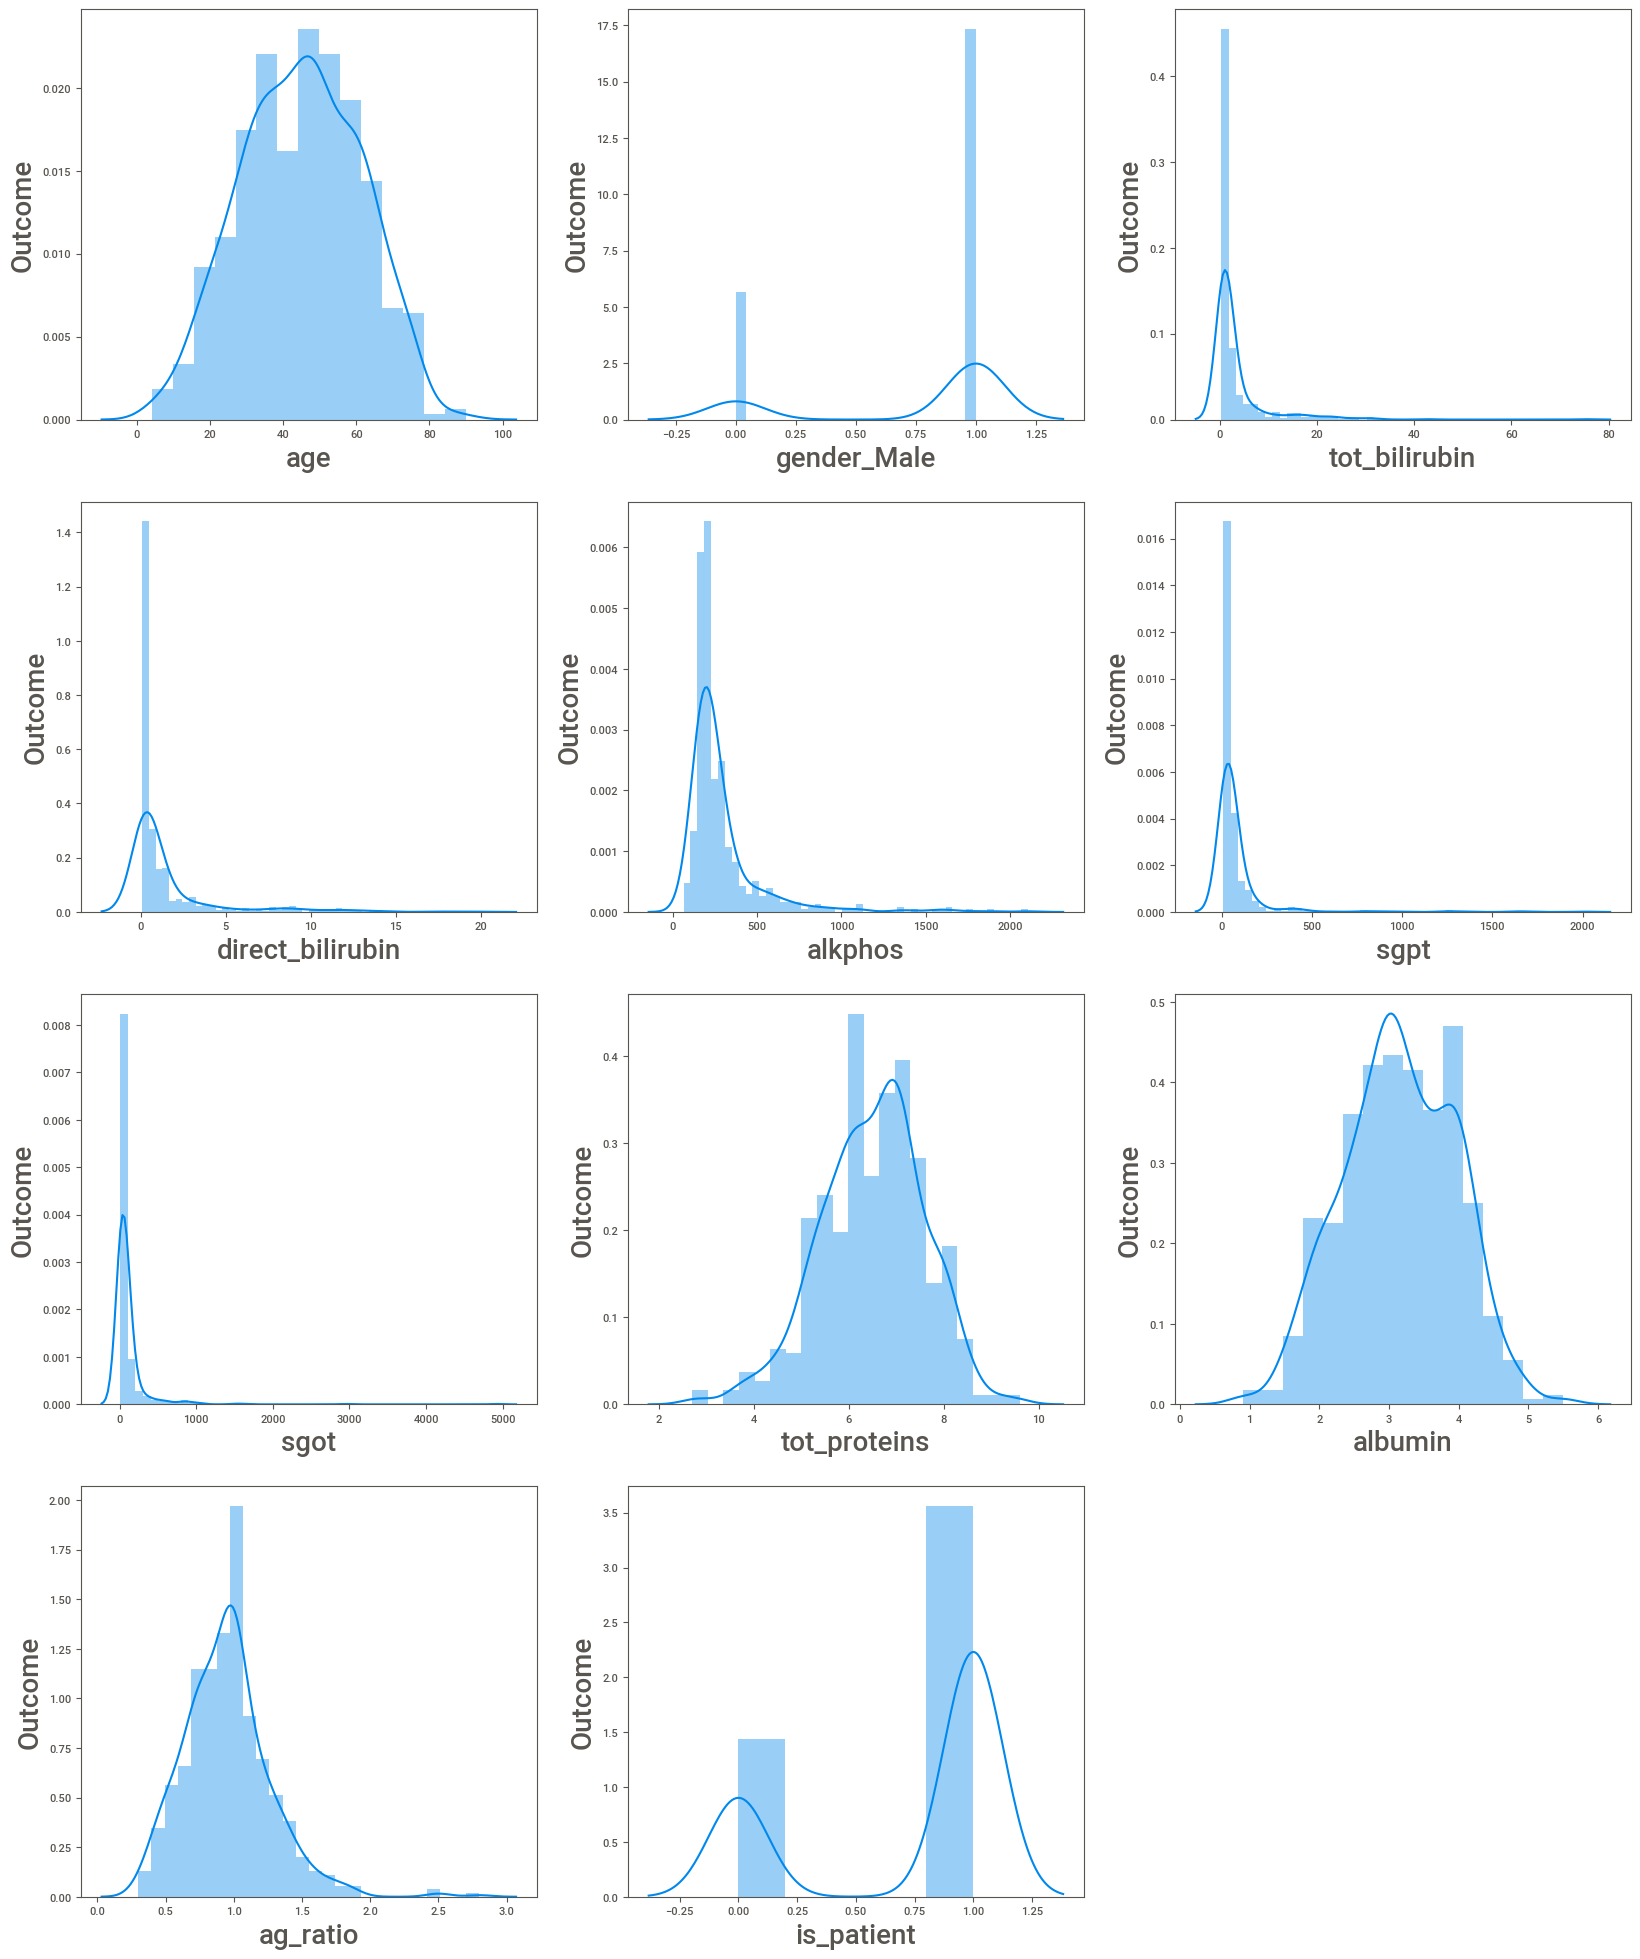

In [40]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in data.columns:
    if plotnumber <= 12:
        ax = plt.subplot (4, 3, plotnumber)
        sns.distplot(x = data[column])
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Outcome', fontsize = 20)
    plotnumber += 1

We observe that the data are not much skewed

### Bivarient Analysis


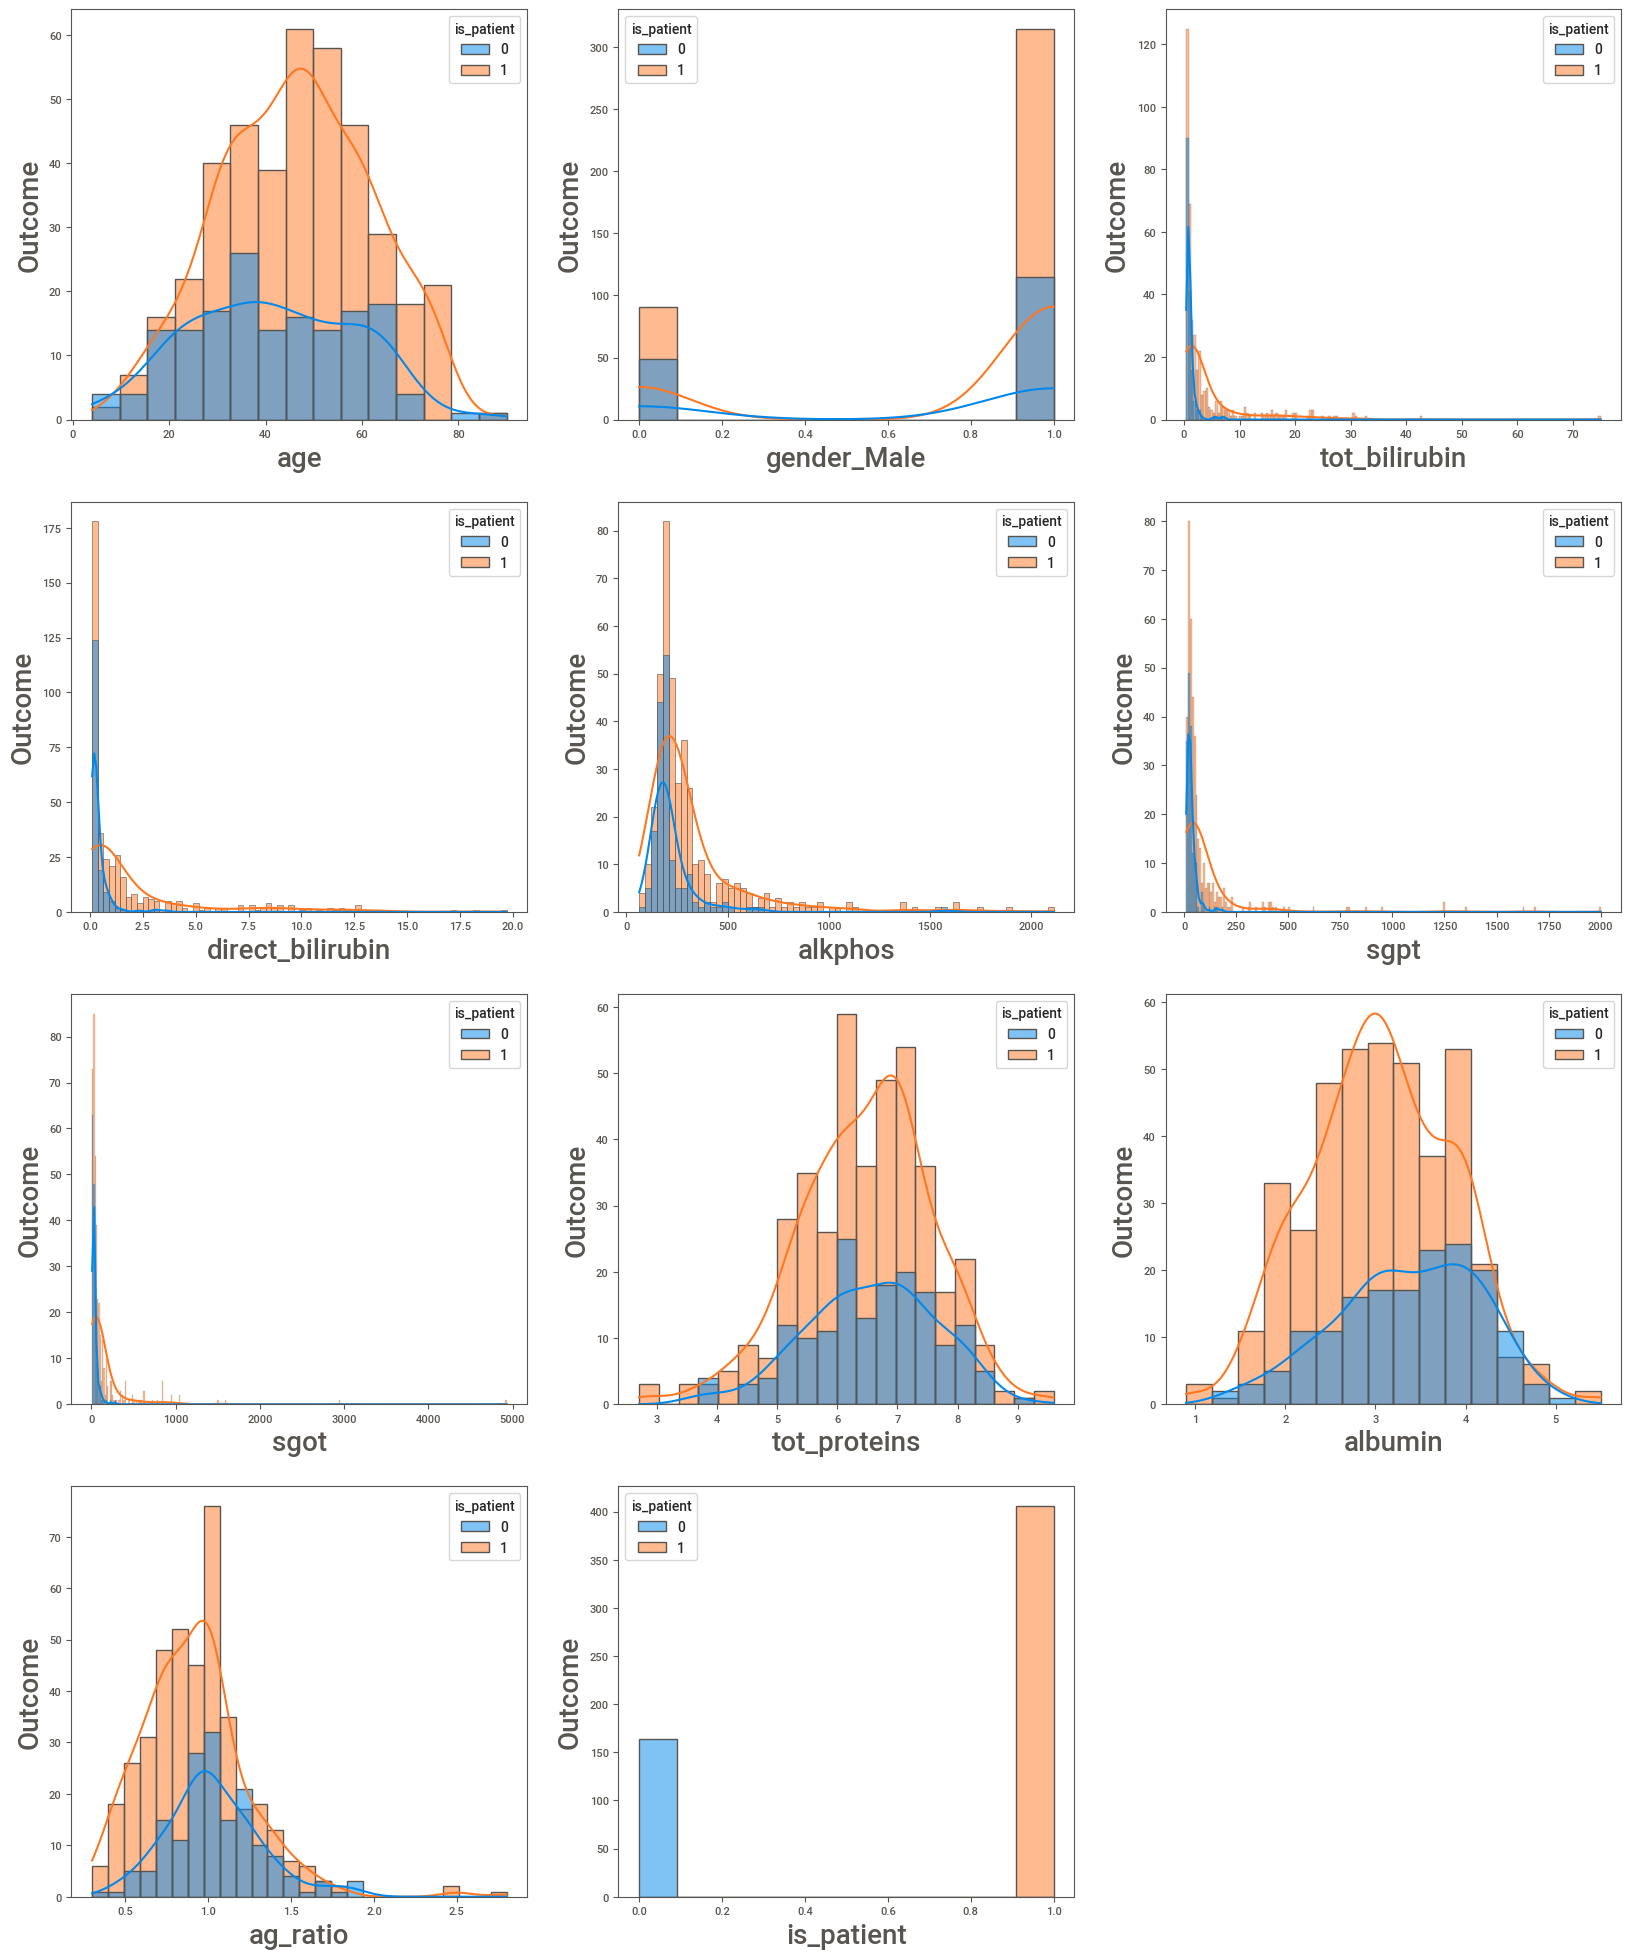

In [41]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in data.columns:
    if plotnumber <= 12:
        ax = plt.subplot (4, 3, plotnumber)
        sns.histplot(x = data[column],hue = data['is_patient'],data=data,kde=True)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Outcome', fontsize = 20)
    plotnumber += 1
plt.show()

From the above Histplot, we observe that the independent feature increases the dependent feature also increases and we observe that higher the value, higher is the chances of having liver disease.

# Splitting data and performing Standard Scaler

In [42]:
x = data.drop(columns = ['is_patient'])
y = data.is_patient

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Dividing the x and y data as train and test using train_test_split method

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.20, random_state = 42)

# Modelling

## Logistic Regression

In [45]:
#importing module
from sklearn.linear_model import LogisticRegression

#making the instance
log= LogisticRegression(random_state=42)

#learning
log.fit(x_train,y_train)

#Prediction
prediction1=log.predict(x_train)
prediction2=log.predict(x_test)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

Log_Accuracy_train = accuracy_score(prediction1,y_train)
Log_Accuracy_test = accuracy_score(prediction2,y_test)

#evaluation(Accuracy)
print("Log_Accuracy_train:",accuracy_score(prediction1,y_train))
print("Log_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2, pos_label = 0))

#Error Rate
print('Error Rate of Testing:', 1-Log_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train, prediction1))  
print(classification_report(y_test, prediction2)) 

Log_Accuracy_train: 0.7280701754385965
Log_Accuracy_test: 0.7105263157894737
Confusion Metrix test:
 [[ 7 11]
 [22 74]]
Precision score of Testing:  0.7708333333333334
Recall/Sensitivity score of Testing:  0.8705882352941177
F1 Score score of Testing:  0.8176795580110497
Specificity Score score of Testing:  0.2413793103448276
Error Rate of Testing: 0.2894736842105263
              precision    recall  f1-score   support

           0       0.59      0.26      0.36       135
           1       0.75      0.93      0.83       321

    accuracy                           0.73       456
   macro avg       0.67      0.59      0.59       456
weighted avg       0.70      0.73      0.69       456

              precision    recall  f1-score   support

           0       0.39      0.24      0.30        29
           1       0.77      0.87      0.82        85

    accuracy                           0.71       114
   macro avg       0.58      0.56      0.56       114
weighted avg       0.67      0.

roc_auc_score for Logistic Regression: 0.7395537525354969


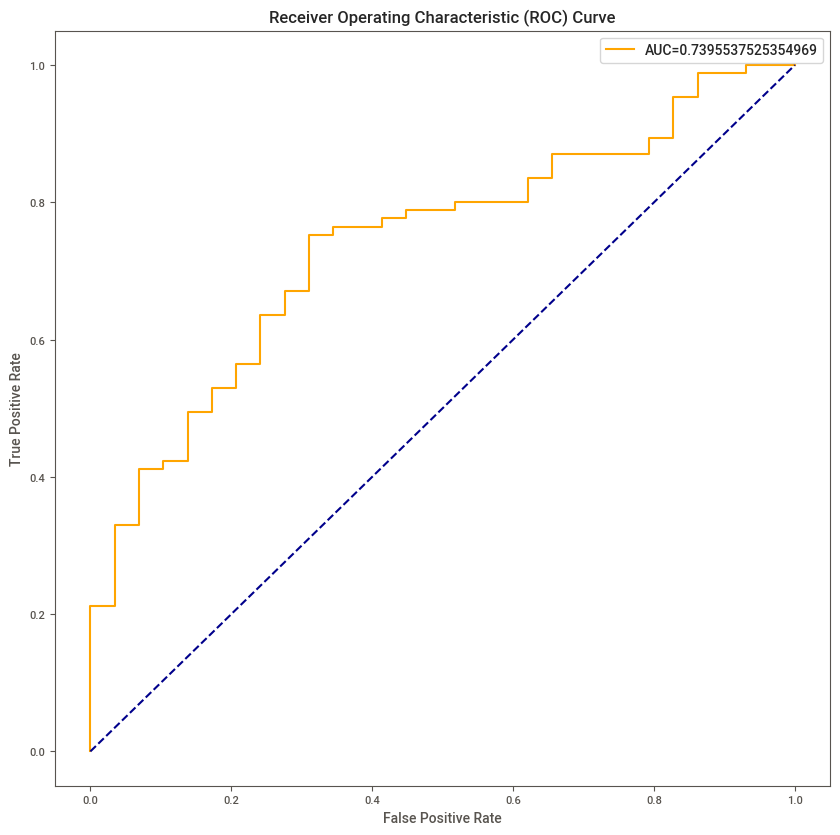

In [46]:
#evaluation(ROC Curve)
y_score1 = log.predict_proba(x_test)[:,1]
LOG_roc_auc_score = roc_auc_score(y_test,y_score1)
print('roc_auc_score for Logistic Regression:', roc_auc_score(y_test,y_score1))

#ROC Curve Plot
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score1)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score1)
plot_roc_curve(fpr, tpr)

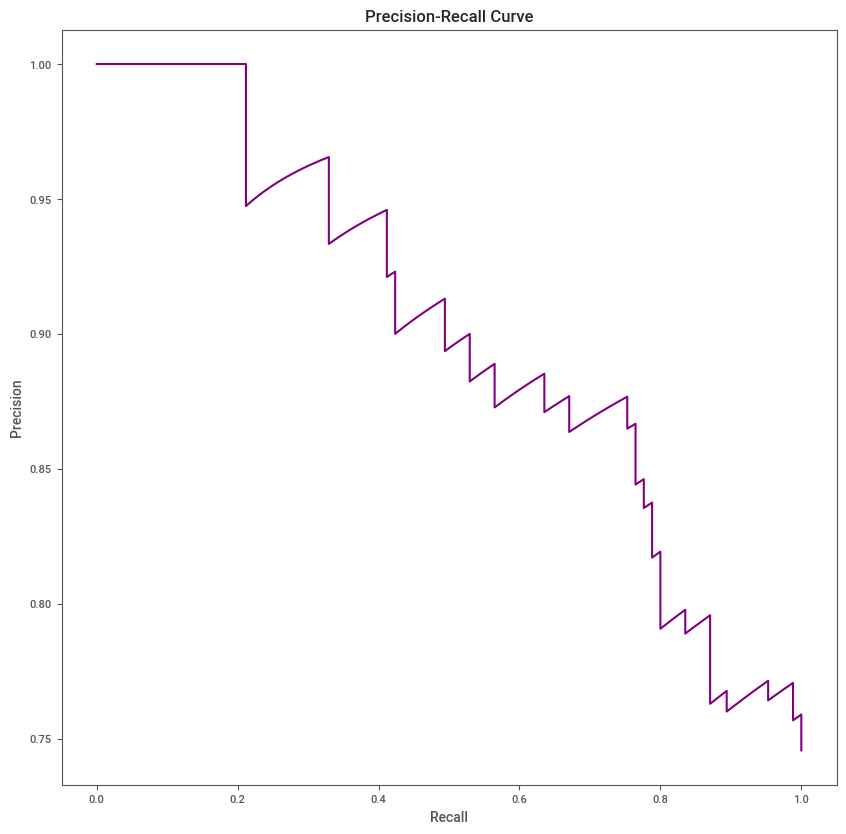

In [47]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score1 = log.predict_proba(x_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score1)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

## Decision Tree Classifier

In [48]:
#importing module
from sklearn.tree import DecisionTreeClassifier

#making the instance
dt= DecisionTreeClassifier(random_state=42)

#learning
dt.fit(x_train,y_train)

#Prediction
prediction1=dt.predict(x_train)
prediction2=dt.predict(x_test)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

DT_Accuracy_train = accuracy_score(prediction1,y_train)
DT_Accuracy_test = accuracy_score(prediction2,y_test)

#evaluation(Accuracy)
print("DT_Accuracy_train:",accuracy_score(prediction1,y_train))
print("DT_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2, pos_label = 0))

#Error Rate
print('Error Rate of Testing:', 1-DT_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train, prediction1))  
print(classification_report(y_test, prediction2)) 

DT_Accuracy_train: 1.0
DT_Accuracy_test: 0.5789473684210527
Confusion Metrix test:
 [[13 32]
 [16 53]]
Precision score of Testing:  0.7681159420289855
Recall/Sensitivity score of Testing:  0.6235294117647059
F1 Score score of Testing:  0.6883116883116883
Specificity Score score of Testing:  0.4482758620689655
Error Rate of Testing: 0.42105263157894735
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       321

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

              precision    recall  f1-score   support

           0       0.29      0.45      0.35        29
           1       0.77      0.62      0.69        85

    accuracy                           0.58       114
   macro avg       0.53      0.54      0.52       114
weighted avg       0.65      0.58      0.60    

roc_auc_score for Decision Tree: 0.5359026369168357


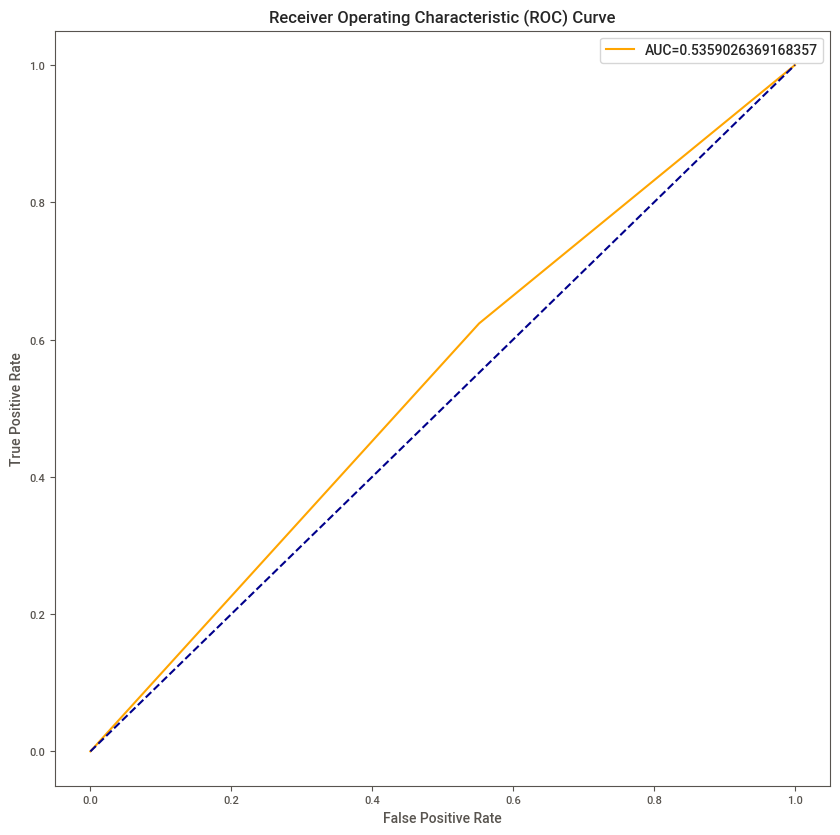

In [49]:
#evaluation(ROC Curve)
y_score2 = dt.predict_proba(x_test)[:,1]
DT_roc_auc_score = roc_auc_score(y_test,y_score2)
print('roc_auc_score for Decision Tree:', roc_auc_score(y_test,y_score2))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score2)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score2)
plot_roc_curve(fpr, tpr)

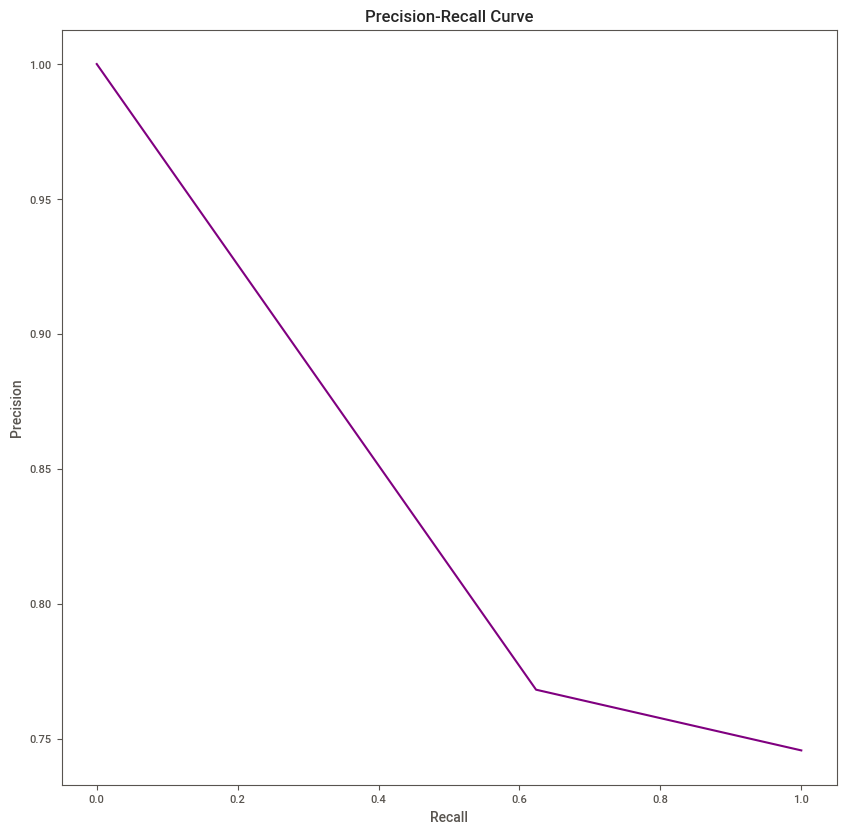

In [50]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score2 = dt.predict_proba(x_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score2)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

## Random Forest Classifier

In [51]:
#importing module
from sklearn.ensemble import RandomForestClassifier

#making the instance
rf= RandomForestClassifier(random_state=42)

#learning
rf.fit(x_train,y_train)

#Prediction
prediction1=rf.predict(x_train)
prediction2=rf.predict(x_test)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

RF_Accuracy_train = accuracy_score(prediction1,y_train)
RF_Accuracy_test = accuracy_score(prediction2,y_test)

#evaluation(Accuracy)
print("RF_Accuracy_train:",accuracy_score(prediction1,y_train))
print("RF_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2, pos_label = 0))

#Error Rate
print('Error Rate of Testing:', 1-RF_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train, prediction1))  
print(classification_report(y_test, prediction2)) 

RF_Accuracy_train: 1.0
RF_Accuracy_test: 0.7368421052631579
Confusion Metrix test:
 [[12 13]
 [17 72]]
Precision score of Testing:  0.8089887640449438
Recall/Sensitivity score of Testing:  0.8470588235294118
F1 Score score of Testing:  0.8275862068965517
Specificity Score score of Testing:  0.41379310344827586
Error Rate of Testing: 0.26315789473684215
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       321

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

              precision    recall  f1-score   support

           0       0.48      0.41      0.44        29
           1       0.81      0.85      0.83        85

    accuracy                           0.74       114
   macro avg       0.64      0.63      0.64       114
weighted avg       0.73      0.74      0.73   

roc_auc_score for Random Forest: 0.7365111561866126


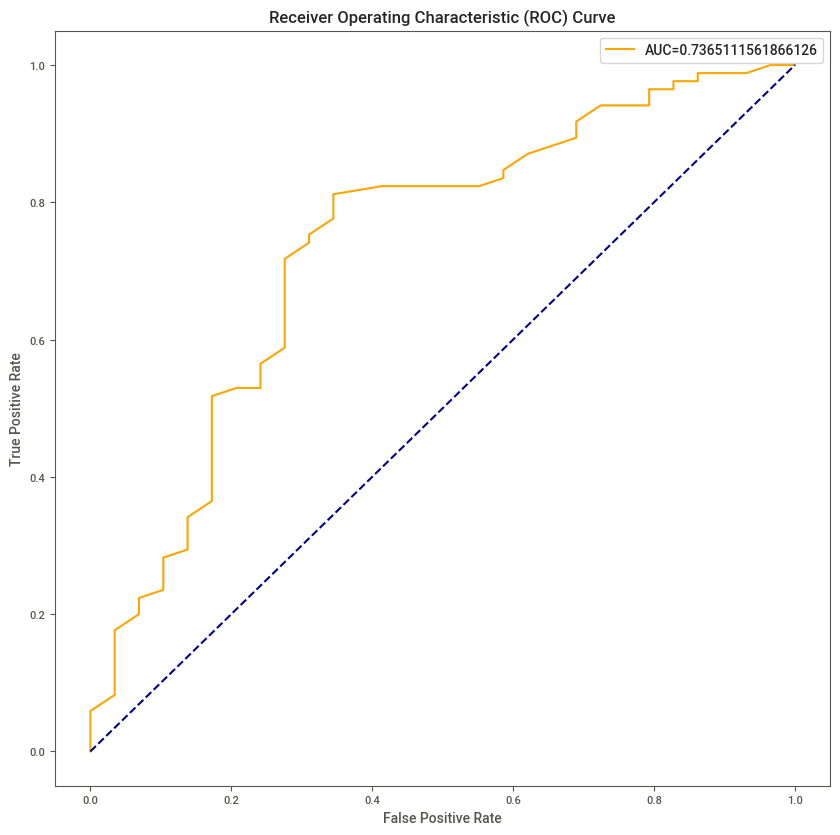

In [52]:
#evaluation(ROC Curve)
y_score3 = rf.predict_proba(x_test)[:,1]
RF_roc_auc_score = roc_auc_score(y_test,y_score3)
print('roc_auc_score for Random Forest:', roc_auc_score(y_test,y_score3))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score3)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score3)
plot_roc_curve(fpr, tpr)

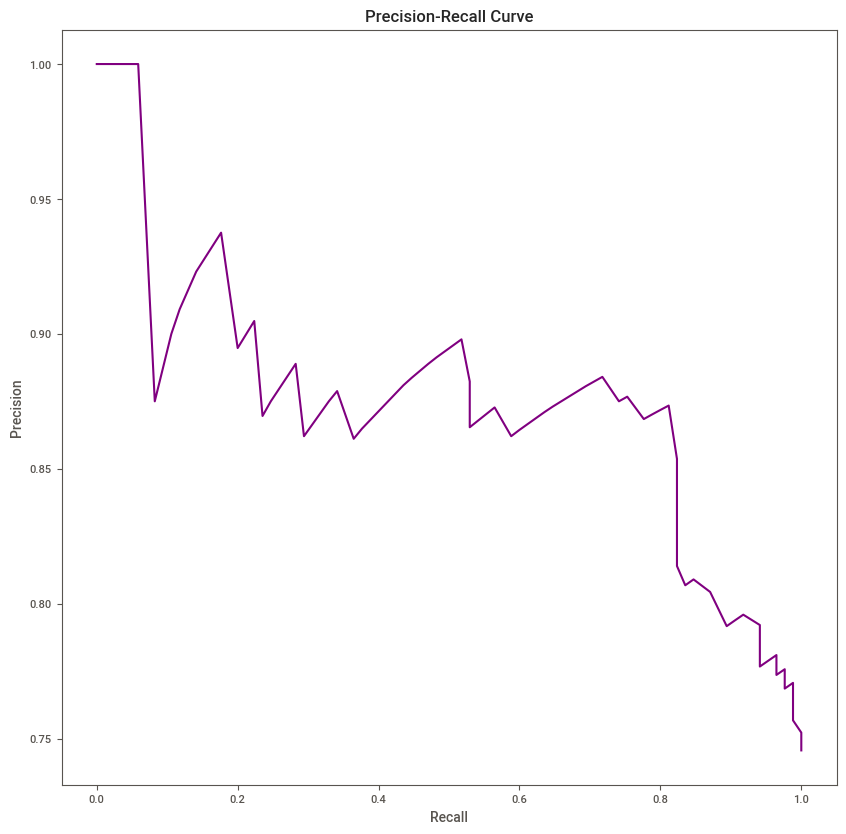

In [53]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score3 = rf.predict_proba(x_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score3)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

## Support vector classifier 

In [54]:
#importing module
from sklearn.svm import SVC

#making the instance
svc= SVC(random_state=42)

#learning
svc.fit(x_train,y_train)

#Prediction
prediction1=svc.predict(x_train)
prediction2=svc.predict(x_test)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

SVC_Accuracy_train = accuracy_score(prediction1,y_train)
SVC_Accuracy_test = accuracy_score(prediction2,y_test)

#evaluation(Accuracy)
print("SVC_Accuracy_train:",accuracy_score(prediction1,y_train))
print("SVC_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2, pos_label = 0))

#Error Rate
print('Error Rate of Testing:', 1-SVC_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train, prediction1))  
print(classification_report(y_test, prediction2)) 

SVC_Accuracy_train: 0.7280701754385965
SVC_Accuracy_test: 0.7280701754385965
Confusion Metrix test:
 [[ 3  5]
 [26 80]]
Precision score of Testing:  0.7547169811320755
Recall/Sensitivity score of Testing:  0.9411764705882353
F1 Score score of Testing:  0.837696335078534
Specificity Score score of Testing:  0.10344827586206896
Error Rate of Testing: 0.27192982456140347
              precision    recall  f1-score   support

           0       0.67      0.16      0.26       135
           1       0.73      0.97      0.83       321

    accuracy                           0.73       456
   macro avg       0.70      0.56      0.55       456
weighted avg       0.71      0.73      0.66       456

              precision    recall  f1-score   support

           0       0.38      0.10      0.16        29
           1       0.75      0.94      0.84        85

    accuracy                           0.73       114
   macro avg       0.56      0.52      0.50       114
weighted avg       0.66      0

roc_auc_score for Support Vector Machine: 0.6547667342799189


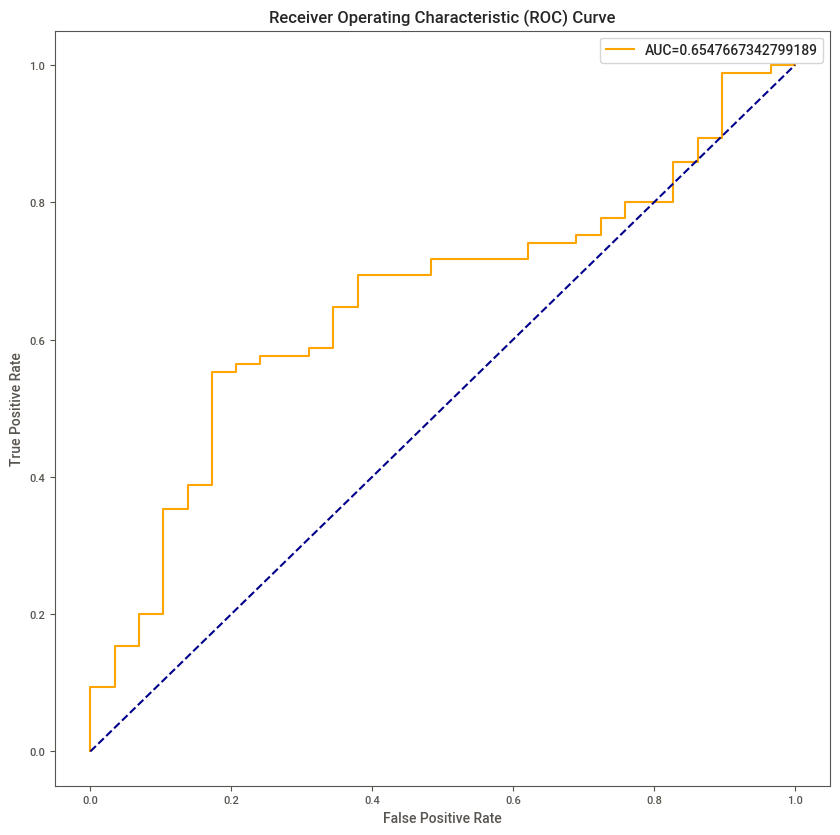

In [55]:
#evaluation(ROC Curve)
from sklearn.pipeline import make_pipeline
clf = make_pipeline(SVC(gamma='auto',probability=True))
clf.fit(x_train,y_train)
y_score4 = clf.predict_proba(x_test)[:,1]
SVC_roc_auc_score = roc_auc_score(y_test,y_score4)
print('roc_auc_score for Support Vector Machine:', roc_auc_score(y_test,y_score4))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score4)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score4)
plot_roc_curve(fpr, tpr)

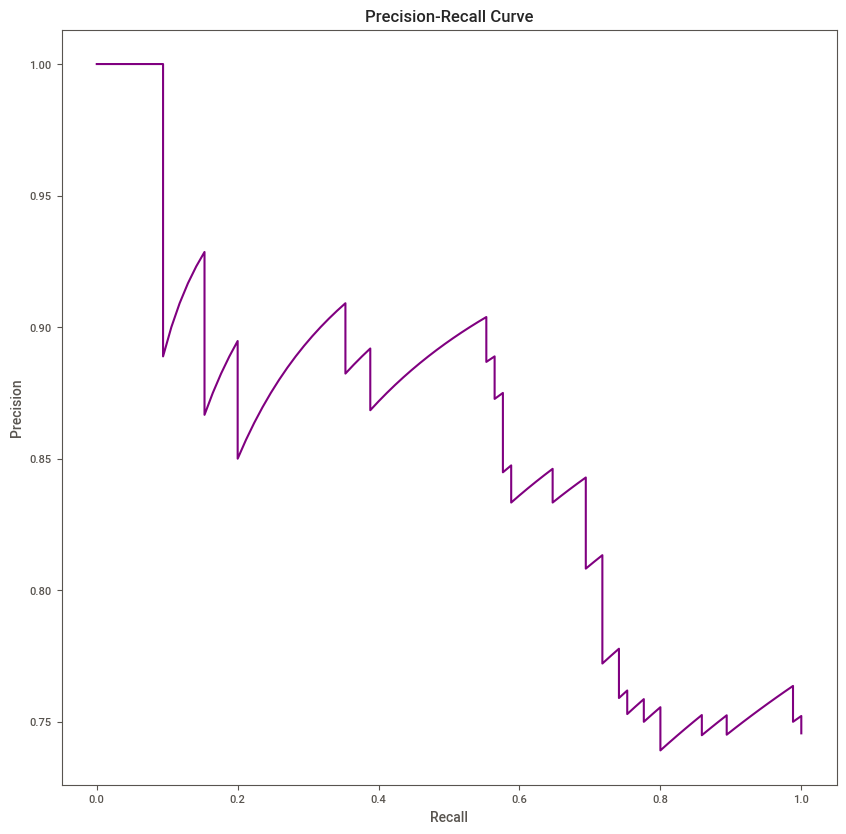

In [56]:
#PR Curve
from sklearn.metrics import precision_recall_curve
clf = make_pipeline(SVC(gamma='auto',probability=True))
clf.fit(x_train,y_train)
y_score4 = clf.predict_proba(x_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score4)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

## kNearest Neighbors

In [57]:
#importing module
from sklearn.neighbors import KNeighborsClassifier

#making the instance
knn = KNeighborsClassifier(n_jobs=-1)

#learning
knn.fit(x_train,y_train)

#Prediction
prediction1=knn.predict(x_train)
prediction2=knn.predict(x_test)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

KNN_Accuracy_train = accuracy_score(prediction1,y_train)
KNN_Accuracy_test = accuracy_score(prediction2,y_test)

#evaluation(Accuracy)
print("KNN_Accuracy_train:",accuracy_score(prediction1,y_train))
print("KNN_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2, pos_label = 0))

#Error Rate
print('Error Rate of Testing:', 1-KNN_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train, prediction1))  
print(classification_report(y_test, prediction2)) 

KNN_Accuracy_train: 0.7982456140350878
KNN_Accuracy_test: 0.6491228070175439
Confusion Metrix test:
 [[13 24]
 [16 61]]
Precision score of Testing:  0.7922077922077922
Recall/Sensitivity score of Testing:  0.7176470588235294
F1 Score score of Testing:  0.7530864197530864
Specificity Score score of Testing:  0.4482758620689655
Error Rate of Testing: 0.3508771929824561
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       135
           1       0.83      0.89      0.86       321

    accuracy                           0.80       456
   macro avg       0.76      0.73      0.75       456
weighted avg       0.79      0.80      0.79       456

              precision    recall  f1-score   support

           0       0.35      0.45      0.39        29
           1       0.79      0.72      0.75        85

    accuracy                           0.65       114
   macro avg       0.57      0.58      0.57       114
weighted avg       0.68      0.

roc_auc_score for K Nearest Neighbors: 0.6436105476673428


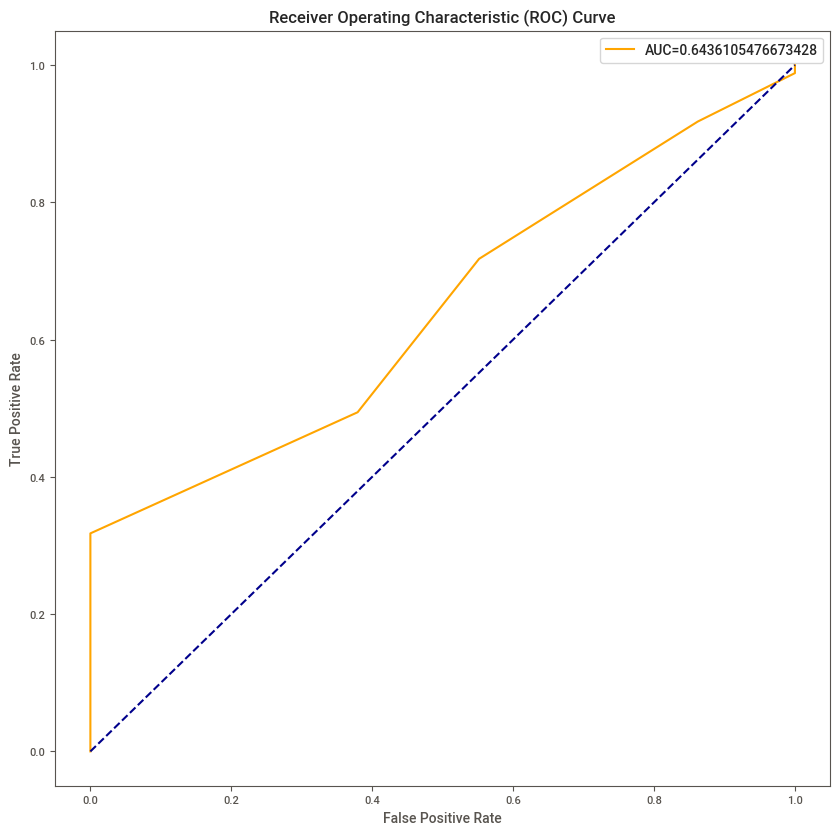

In [58]:
#evaluation(ROC Curve)
y_score5 = knn.predict_proba(x_test)[:,1]
KNN_roc_auc_score = roc_auc_score(y_test,y_score5)
print('roc_auc_score for K Nearest Neighbors:', roc_auc_score(y_test,y_score5))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score5)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score5)
plot_roc_curve(fpr, tpr)

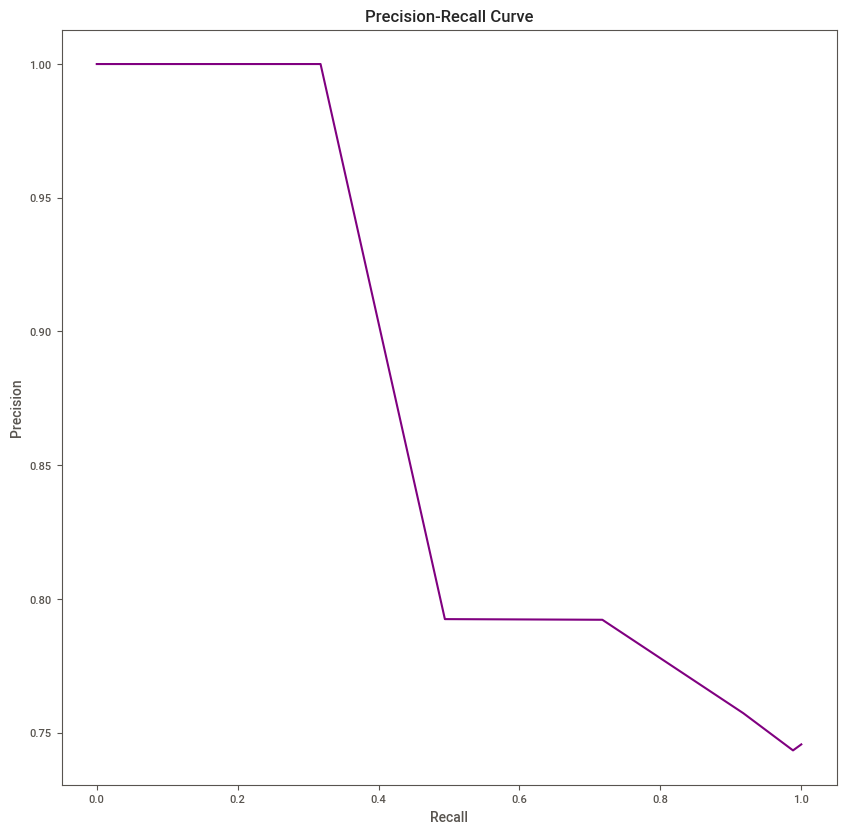

In [59]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score5 = knn.predict_proba(x_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score5)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

## extrem gradient boosting

In [60]:
#!pip install xgboost

In [61]:
#importing module
from xgboost import XGBClassifier

#making the instance
xgb= XGBClassifier(random_state=42)

#learning
xgb.fit(x_train,y_train)

#Prediction
prediction1=xgb.predict(x_train)
prediction2=xgb.predict(x_test)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

XGB_Accuracy_train = accuracy_score(prediction1,y_train)
XGB_Accuracy_test = accuracy_score(prediction2,y_test)

#evaluation(Accuracy)
print("XGB_Accuracy_train:",accuracy_score(prediction1,y_train))
print("XGB_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2, pos_label = 0))

#Error Rate
print('Error Rate of Testing:', 1-XGB_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train, prediction1))  
print(classification_report(y_test, prediction2)) 

XGB_Accuracy_train: 1.0
XGB_Accuracy_test: 0.7280701754385965
Confusion Metrix test:
 [[11 13]
 [18 72]]
Precision score of Testing:  0.8
Recall/Sensitivity score of Testing:  0.8470588235294118
F1 Score score of Testing:  0.822857142857143
Specificity Score score of Testing:  0.3793103448275862
Error Rate of Testing: 0.27192982456140347
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       321

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

              precision    recall  f1-score   support

           0       0.46      0.38      0.42        29
           1       0.80      0.85      0.82        85

    accuracy                           0.73       114
   macro avg       0.63      0.61      0.62       114
weighted avg       0.71      0.73      0.72       114



roc_auc_score for XG Boosting: 0.6778904665314401


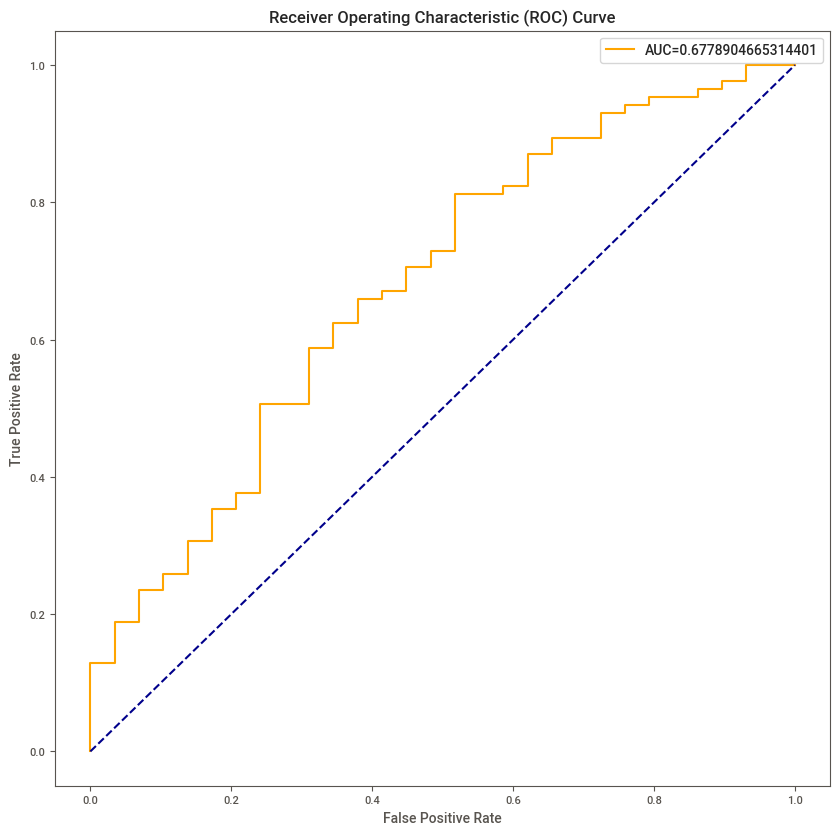

In [62]:
#evaluation(ROC Curve)
y_score6 = xgb.predict_proba(x_test)[:,1]
XGB_roc_auc_score = roc_auc_score(y_test,y_score6)
print('roc_auc_score for XG Boosting:', roc_auc_score(y_test,y_score6))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score6)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score6)
plot_roc_curve(fpr, tpr)

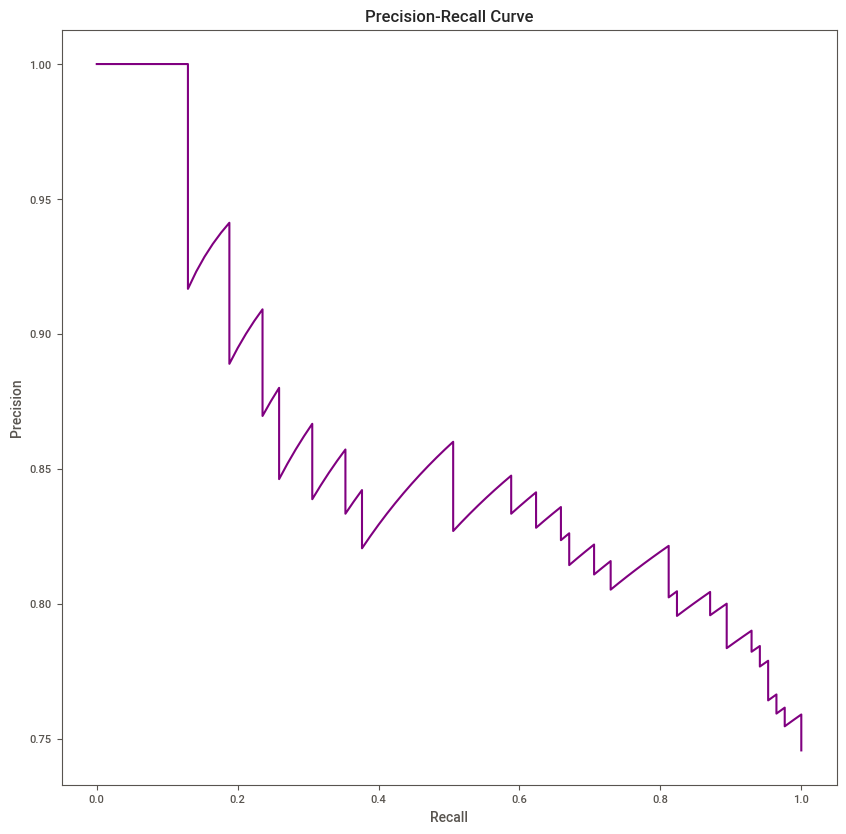

In [63]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score6 = xgb.predict_proba(x_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score6)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

## Gradient Boosting Classifier

In [64]:
#importing module
from sklearn.ensemble import GradientBoostingClassifier

#making the instance
gb= GradientBoostingClassifier(random_state=42)

#learning
gb.fit(x_train,y_train)

#Prediction
prediction1=gb.predict(x_train)
prediction2=gb.predict(x_test)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

GB_Accuracy_train = accuracy_score(prediction1,y_train)
GB_Accuracy_test = accuracy_score(prediction2,y_test)

#evaluation(Accuracy)
print("GB_Accuracy_train:",accuracy_score(prediction1,y_train))
print("GB_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2, pos_label = 0))

#Error Rate
print('Error Rate of Testing:', 1-GB_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train, prediction1))  
print(classification_report(y_test, prediction2)) 

GB_Accuracy_train: 0.9473684210526315
GB_Accuracy_test: 0.6842105263157895
Confusion Metrix test:
 [[ 8 15]
 [21 70]]
Precision score of Testing:  0.7692307692307693
Recall/Sensitivity score of Testing:  0.8235294117647058
F1 Score score of Testing:  0.7954545454545454
Specificity Score score of Testing:  0.27586206896551724
Error Rate of Testing: 0.3157894736842105
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       135
           1       0.93      1.00      0.96       321

    accuracy                           0.95       456
   macro avg       0.96      0.91      0.93       456
weighted avg       0.95      0.95      0.95       456

              precision    recall  f1-score   support

           0       0.35      0.28      0.31        29
           1       0.77      0.82      0.80        85

    accuracy                           0.68       114
   macro avg       0.56      0.55      0.55       114
weighted avg       0.66      0.6

roc_auc_score for Gradient Boosting: 0.6559837728194725


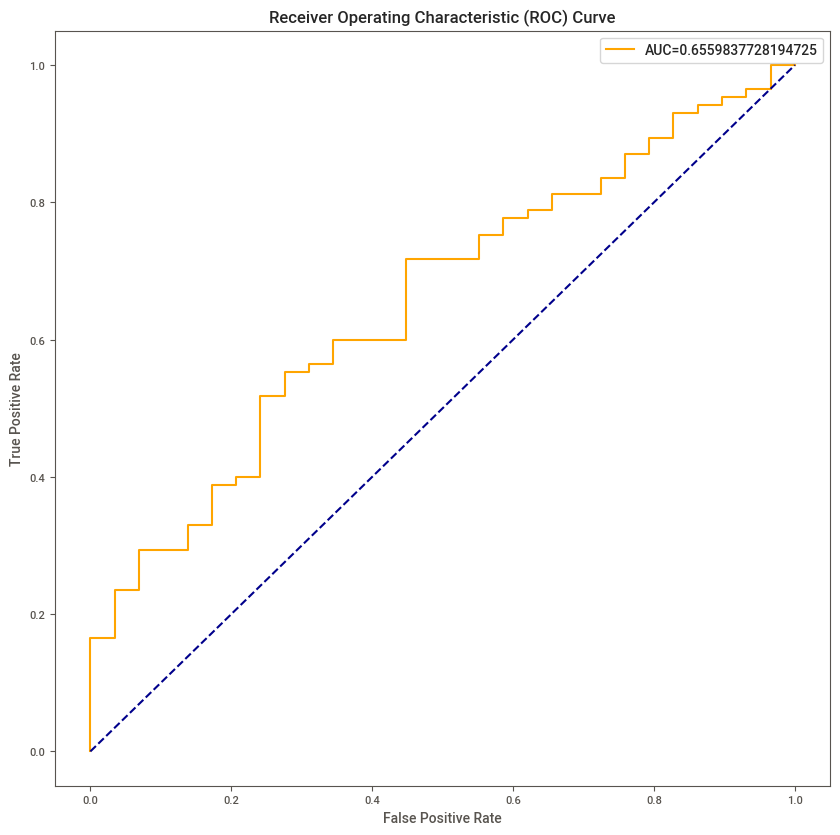

In [65]:
#evaluation(ROC Curve)
y_score7 = gb.predict_proba(x_test)[:,1]
GB_roc_auc_score = roc_auc_score(y_test,y_score7)
print('roc_auc_score for Gradient Boosting:', roc_auc_score(y_test,y_score7))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score7)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score7)
plot_roc_curve(fpr, tpr)

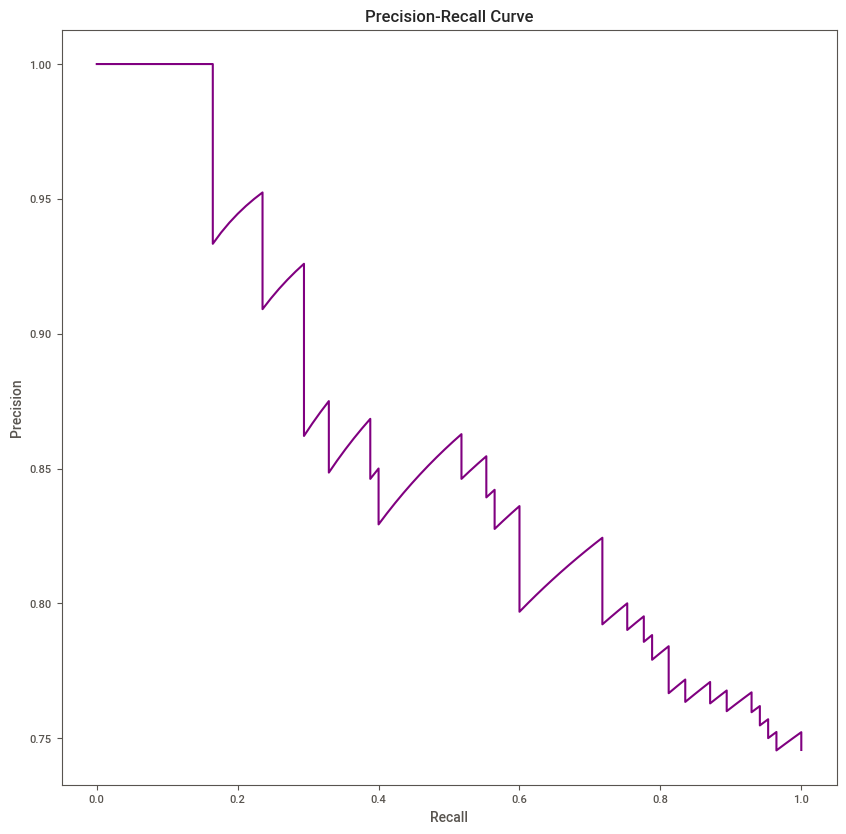

In [66]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score = gb.predict_proba(x_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score7)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

# Modelling with hyperparameter tuning 

## Logestic regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
#Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
#Instantiating logistic regression classifier
logreg = LogisticRegression()
 
#Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(x, y)
 
#Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 8.483428982440725e-05}
Best score is 0.7210526315789474


## Decision Tree Classifier

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#making the instance
model= DecisionTreeClassifier(random_state=42)

#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

#Learning
model1.fit(x_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)

#Prediction
prediction=model1.predict(x_test)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 123}
Accuracy: 0.7368421052631579
Confusion Metrix:
 [[13 14]
 [16 71]]


## Random Forest Classifier

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#making the instance
model=RandomForestClassifier()

#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

#learning
model1.fit(x_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(x_test)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.7631578947368421
Confusion Metrix:
 [[12 10]
 [17 75]]


## Support vector Classifier

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#making the instance
model=svm.SVC()

#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

#Learning
model1.fit(x_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(x_test)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'C': 7, 'kernel': 'linear'}
Accuracy: 0.7456140350877193
Confusion Metrix:
 [[ 0  0]
 [29 85]]


## K Neighbors Classifier 

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#making the instance
model = KNeighborsClassifier(n_jobs=-1)

#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)

#Learning
model1.fit(x_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(x_test)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.631578947368421
Confusion Metrix:
 [[13 26]
 [16 59]]


# Model Result Analysis

In [72]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier', 'KNN', 'XGB', 'GB'], 'train_accuracy': [Log_Accuracy_train, DT_Accuracy_train, RF_Accuracy_train, SVC_Accuracy_train, KNN_Accuracy_train, XGB_Accuracy_train, GB_Accuracy_train], 'test_accuracy': [Log_Accuracy_test, DT_Accuracy_test, RF_Accuracy_test, SVC_Accuracy_test, KNN_Accuracy_test, XGB_Accuracy_test, GB_Accuracy_test], 'AUC Score':[LOG_roc_auc_score, DT_roc_auc_score, RF_roc_auc_score, SVC_roc_auc_score, KNN_roc_auc_score, XGB_roc_auc_score, GB_roc_auc_score]})
models

Model  train_accuracy  test_accuracy  AUC Score
0        Logistic Regression        0.728070       0.710526   0.739554
1              Decision Tree        1.000000       0.578947   0.535903
2              Random Forest        1.000000       0.736842   0.736511
3  Support Vector Classifier        0.728070       0.728070   0.654767
4                        KNN        0.798246       0.649123   0.643611
5                        XGB        1.000000       0.728070   0.677890
6                         GB        0.947368       0.684211   0.655984

# Conclusion

The given dataset was a Supervised Classification prediction of Liver Patient, and the data was imported to Jupiter notebook using Pandas library. We had gone through the features of the dataset. Now the dataset is ready to fed into the classifier and this was achieved by replacing null values and removing duplicate data and converting categorical features. The data set was split into Training and Testing set.

Algorithms and Tuning Parameters used to determine the Liver Patient Prediction:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Classifier
5. K Nearest Neighbour
6. Extreme Gradient Boosting
7. Gradient Boosting

Compared to all the models Logestic Regression is giving the best accuracy and also highest AUC score, but we cannot conclude this model prediction as final because the dataset is too small.